In [385]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Problem Statement**

A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply. You are a data scientist, who has to
come up with useful insights using the data and make prediction models to forecast the sales for
X number of months/years.

In [386]:
df = pd.read_csv('sample_data/Walmart.csv')
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [387]:
df.isnull().sum().sum()

0

In [388]:
df.duplicated().sum()

0

In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [390]:
df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')

In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [392]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [393]:
df.describe()

Store                 Date  Weekly_Sales  Holiday_Flag  \
count  6435.000000                 6435  6.435000e+03   6435.000000   
mean     23.000000  2011-06-17 00:00:00  1.046965e+06      0.069930   
min       1.000000  2010-02-05 00:00:00  2.099862e+05      0.000000   
25%      12.000000  2010-10-08 00:00:00  5.533501e+05      0.000000   
50%      23.000000  2011-06-17 00:00:00  9.607460e+05      0.000000   
75%      34.000000  2012-02-24 00:00:00  1.420159e+06      0.000000   
max      45.000000  2012-10-26 00:00:00  3.818686e+06      1.000000   
std      12.988182                  NaN  5.643666e+05      0.255049   

       Temperature   Fuel_Price          CPI  Unemployment         Year  \
count  6435.000000  6435.000000  6435.000000   6435.000000  6435.000000   
mean     60.663782     3.358607   171.578394      7.999151  2010.965035   
min      -2.060000     2.472000   126.064000      3.879000  2010.000000   
25%      47.460000     2.933000   131.735000      6.891000  2010.000000   
50%      62.670000     3.445000   182.616521      7.874000  2011.000000   
75%      74.940000     3.735000   212.743293      8.622000  2012.000000   
max     100.140000     4.468000   227.232807     14.313000  2012.000000   
std      18.444933     0.459020    39.356712      1.875885     0.797019   

             Month          Day  
count  6435.000000  6435.000000  
mean      6.447552    15.678322  
min       1.000000     1.000000  
25%       4.000000     8.000000  
50%       6.000000    16.000000  
75%       9.000000    23.000000  
max      12.000000    31.000000  
std       3.238308     8.755780

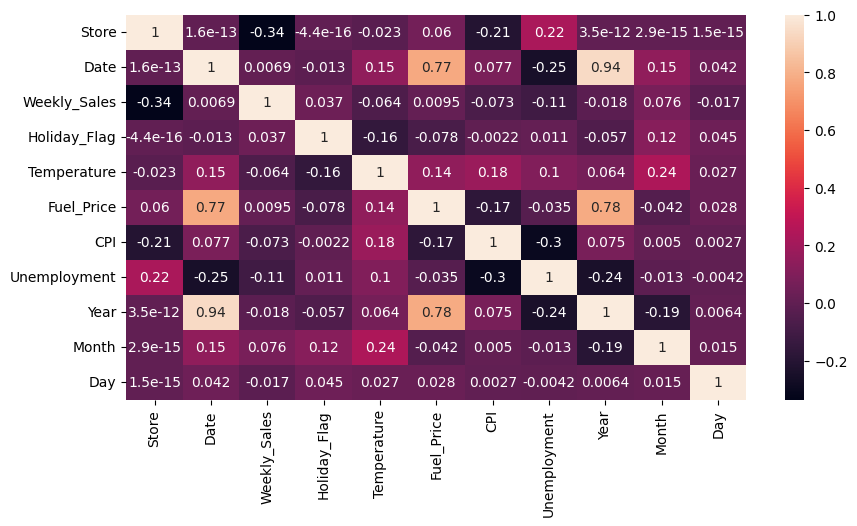

In [394]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

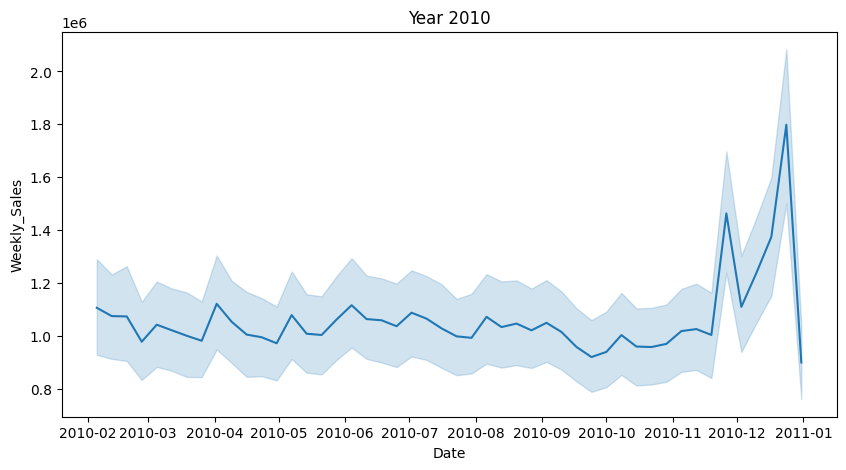

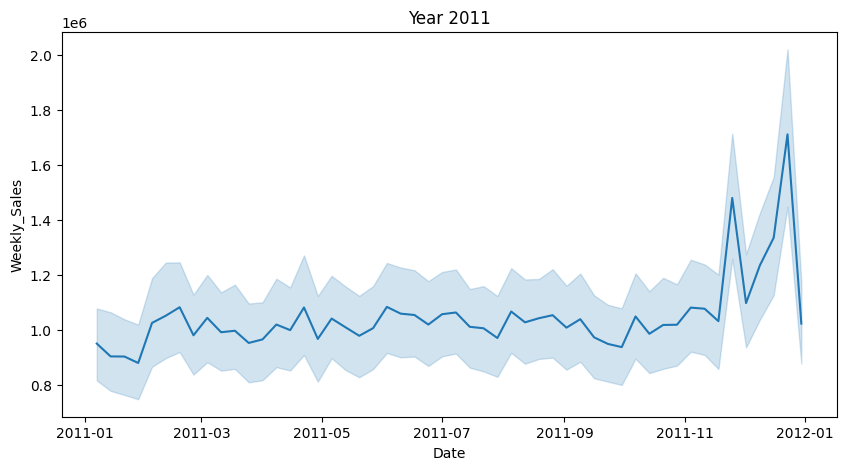

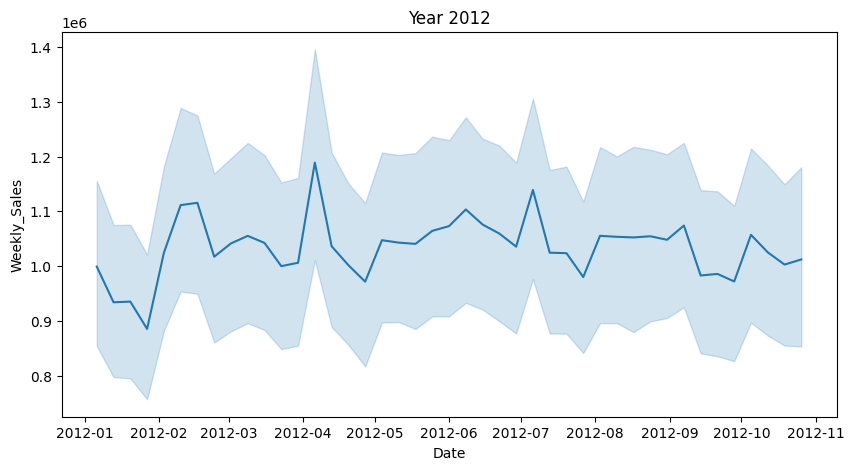

In [395]:
for year in df['Year'].unique():
  plt.figure(figsize=(10,5))
  sns.lineplot(x='Date',y='Weekly_Sales',data=df[df['Year']==year])
  plt.title('Year '+str(year))
  plt.show()

# Store 33 has minimal sales and Store 20 has maximal sales

# Assigning a specific color for the stores have the lowest and highest sales


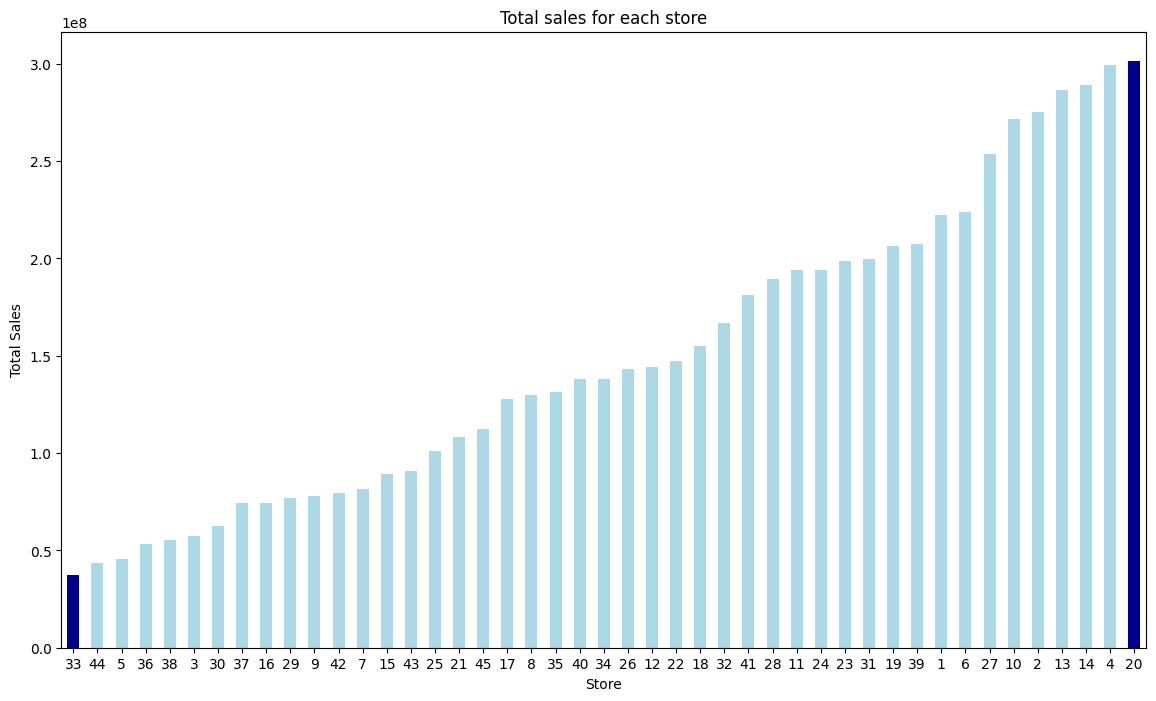

In [396]:

clrs = ['lightblue' if ((x < max(total_sales_for_each_store_array)) and (x > min(total_sales_for_each_store_array))) else 'darkblue' for x in total_sales_for_each_store_array]
plt.figure(figsize=(14,8))
ax = total_sales_for_each_store.plot(kind='bar',color=clrs);
plt.xticks(rotation=0)
plt.title('Total sales for each store')
plt.xlabel('Store')
plt.ylabel('Total Sales');


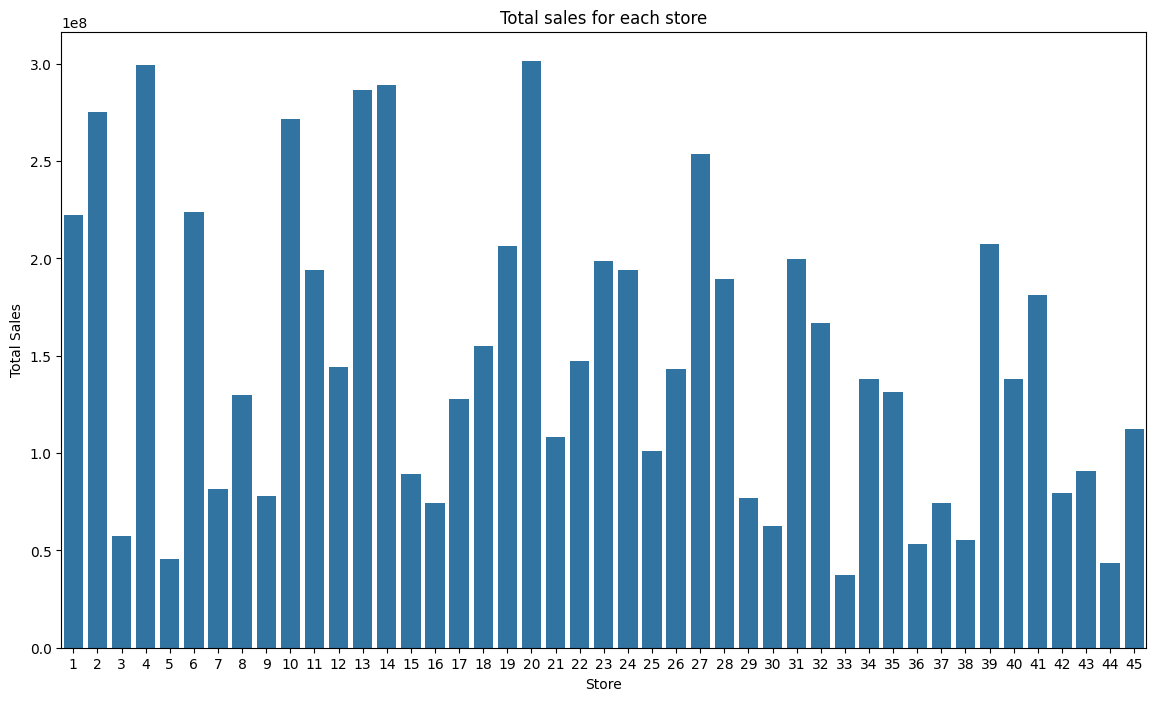

In [397]:
total_sales_for_each_store = df.groupby('Store')['Weekly_Sales'].sum().sort_values()
total_sales_for_each_store_array = np.array(total_sales_for_each_store) # convert to array
plt.figure(figsize=(14,8))
sns.barplot(x=total_sales_for_each_store.index,y=total_sales_for_each_store)
plt.title('Total sales for each store')
plt.xlabel('Store')
plt.ylabel('Total Sales');

The store has maximum standard deviation is 14 with 317570 


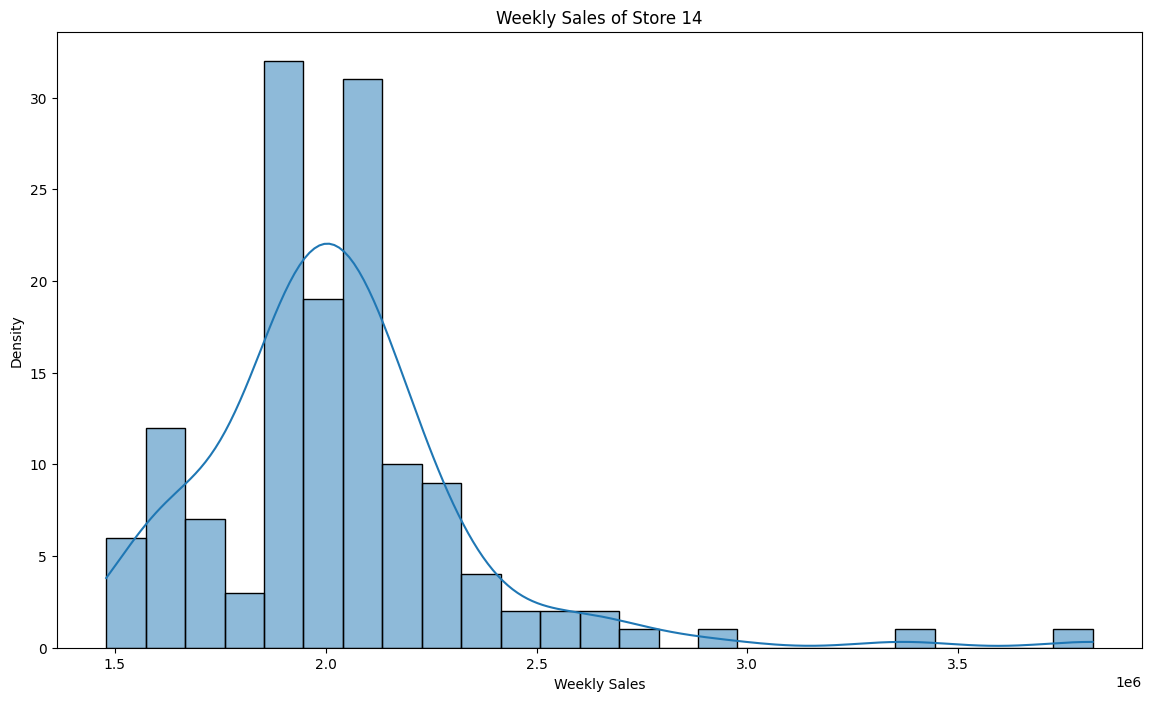

In [398]:
data_std = pd.DataFrame(df.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False))
print("The store has maximum standard deviation is "+str(data_std.head(1).index[0])+" with {0:.0f} ".format(data_std.head(1).Weekly_Sales[data_std.head(1).index[0]]))

plt.figure(figsize=(14,8))
sns.histplot(df[df['Store']==data_std.head(1).index[0]]['Weekly_Sales'],kde=True)
plt.ylabel('Density')
plt.xlabel('Weekly Sales')
plt.title('Weekly Sales of Store '+str(data_std.head(1).index[0]))
plt.show()

#The store has maximum standard deviation is 14 with 317570


# Coefficient of mean to standard deviation


In [399]:

coef_mean_std = pd.DataFrame(df.groupby('Store')['Weekly_Sales'].std() / df.groupby('Store')['Weekly_Sales'].mean())
coef_mean_std = coef_mean_std.rename(columns={'Weekly_Sales':'Coefficient of mean to standard deviation'})
coef_mean_std.head()


Coefficient of mean to standard deviation
Store                                           
1                                       0.100292
2                                       0.123424
3                                       0.115021
4                                       0.127083
5                                       0.118668

# Distribution of store has maximum coefficient of mean to standard deviation


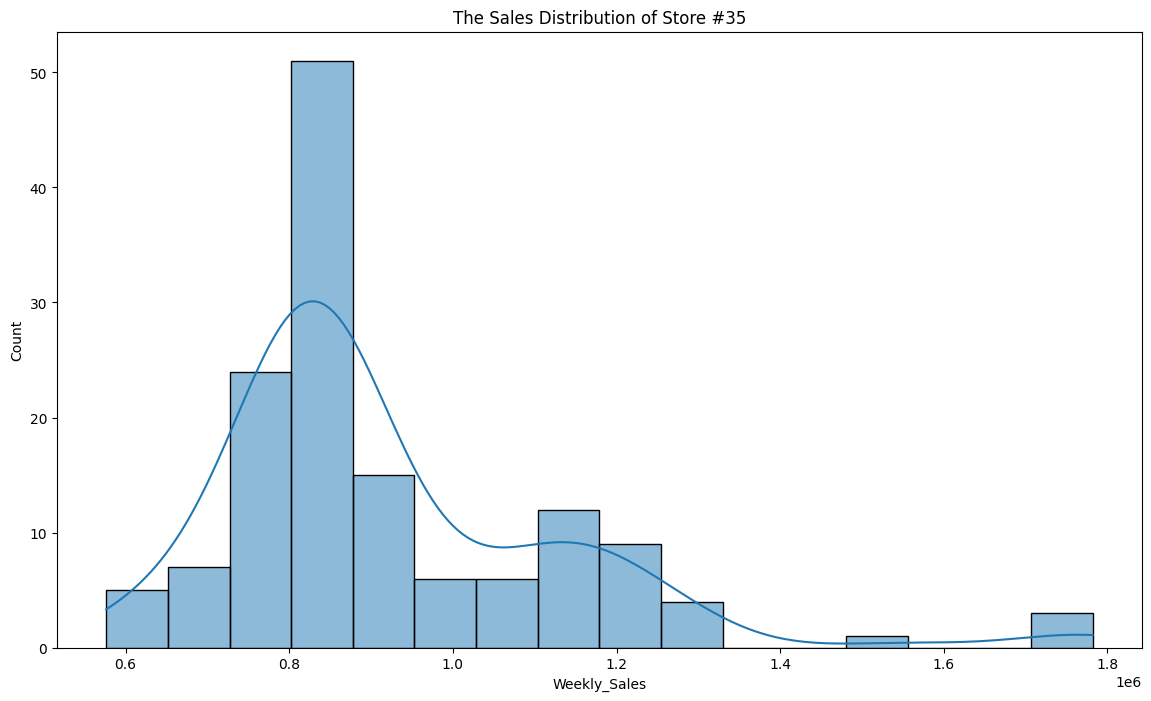

In [400]:
coef_mean_std_max = coef_mean_std.sort_values(by='Coefficient of mean to standard deviation')
plt.figure(figsize=(14,8))
sns.histplot(df[df['Store'] == coef_mean_std_max.tail(1).index[0]]['Weekly_Sales'],kde=True)
plt.title('The Sales Distribution of Store #'+str(coef_mean_std_max.tail(1).index[0]));

#Which store/s has good quarterly growth rate in 2012


In [401]:
Q3 = df[(df['Date']>='2012-07-01') & (df['Date']<='2012-09-30')].groupby('Store')['Weekly_Sales'].sum()
Q2 = df[(df['Date']>='2012-04-01') & (df['Date']<='2012-06-30')].groupby('Store')['Weekly_Sales'].sum()
Q1 = df[(df['Date']>='2012-01-01') & (df['Date']<='2012-03-31')].groupby('Store')['Weekly_Sales'].sum()

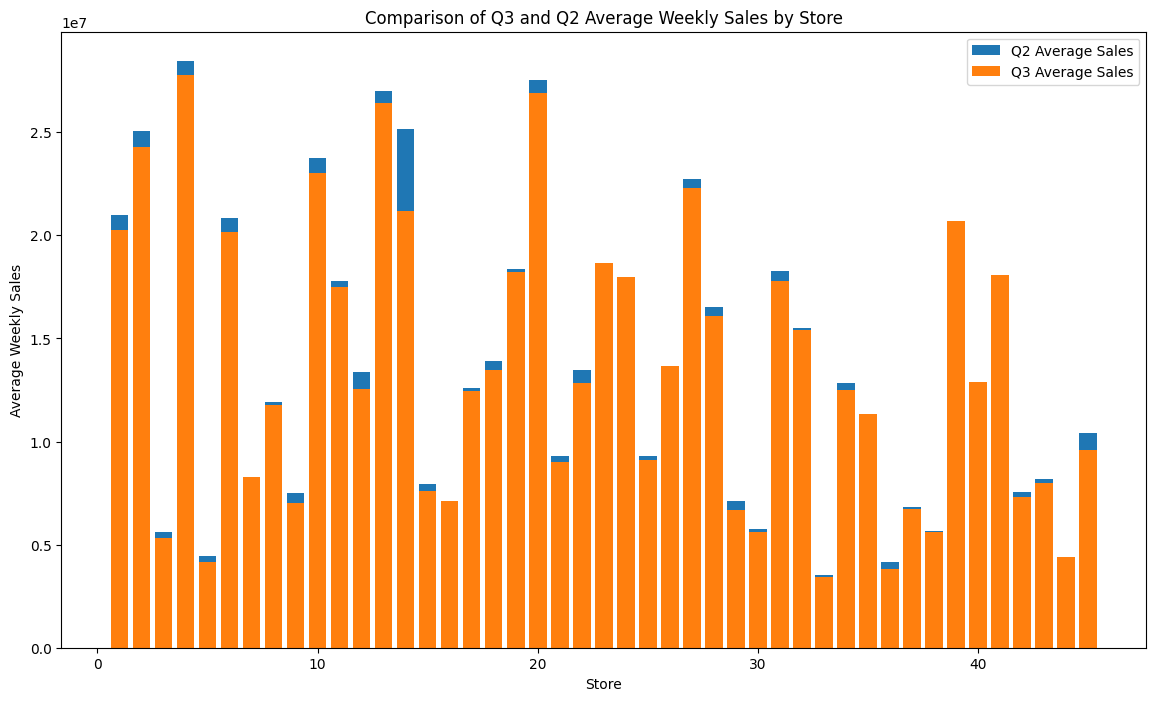

In [402]:

plt.figure(figsize=(14, 8))
plt.bar(Q2.index, Q2.values, label='Q2 Average Sales')
plt.bar(Q3.index, Q3.values, label='Q3 Average Sales')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.title('Comparison of Q3 and Q2 Average Weekly Sales by Store')
plt.legend()
plt.xticks(rotation=0)
plt.show()


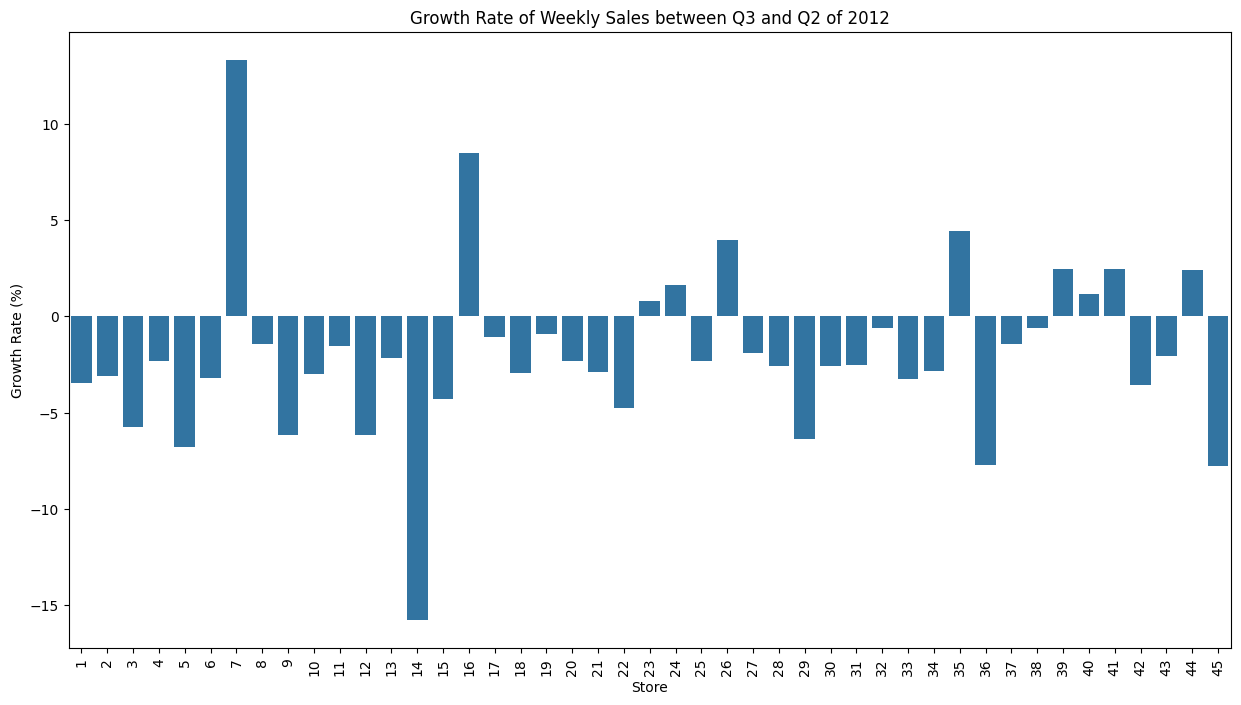

In [403]:

growth_rate = (Q3 - Q2) / Q2 * 100

plt.figure(figsize=(15, 8))
sns.barplot(x=growth_rate.index, y=growth_rate.values)
plt.title('Growth Rate of Weekly Sales between Q3 and Q2 of 2012')
plt.xlabel('Store')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=90)
plt.show()


In [404]:
print('Store have good quarterly growth rate in Q3’2012 is Store '+str(growth_rate.idxmax())+' With '+str(round(growth_rate.max(),2))+' %')


Store have good quarterly growth rate in Q3’2012 is Store 7 With 13.33 %


#Store have good quarterly growth rate in Q3’2012 is Store 7 With 13.33 %


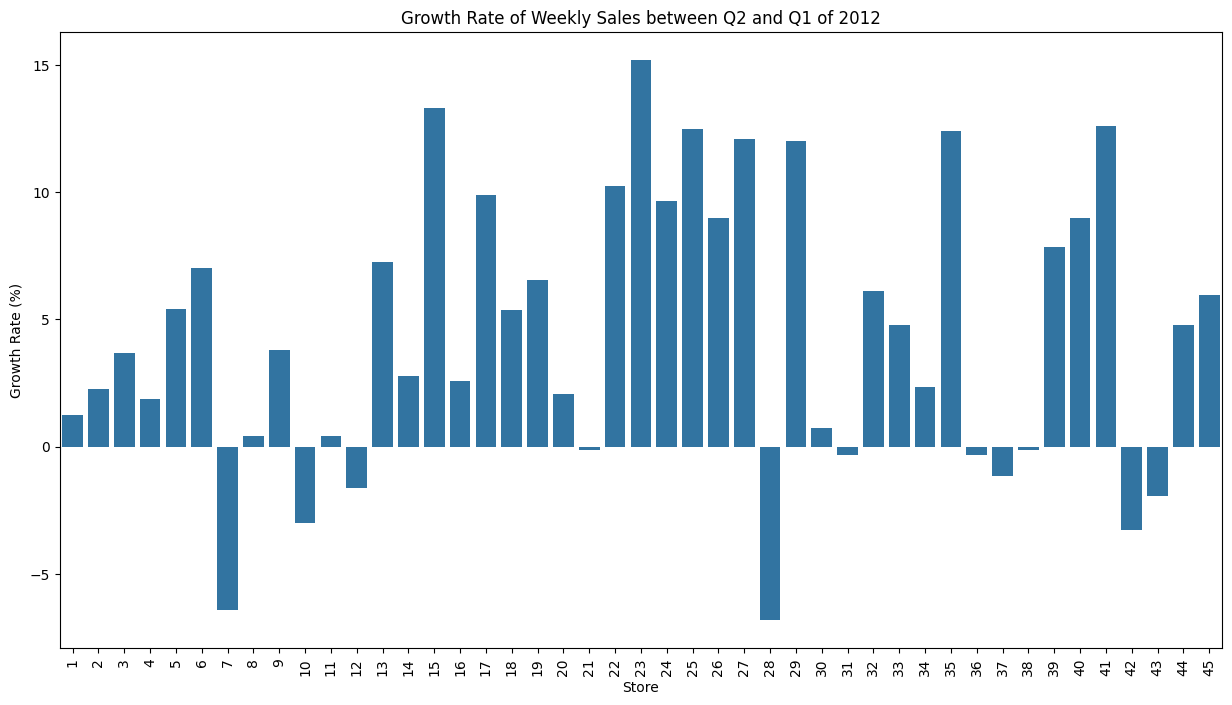

In [405]:

growth_rate = (Q2 - Q1) / Q1 * 100


plt.figure(figsize=(15, 8))
sns.barplot(x=growth_rate.index, y=growth_rate.values)
plt.title('Growth Rate of Weekly Sales between Q2 and Q1 of 2012')
plt.xlabel('Store')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=90)
plt.show()


In [406]:
print('Store have good quarterly growth rate in Q2’2012 is Store '+str(growth_rate.idxmax())+' With '+str(round(growth_rate.max(),2))+' %')


Store have good quarterly growth rate in Q2’2012 is Store 23 With 15.2 %


#Store have good quarterly growth rate in Q2’2012 is Store 23 With 15.2 %


In [407]:
from matplotlib import dates
from datetime import datetime

#Impact of Holidays on Sales, considering two holidays thanksgiving and Christmas

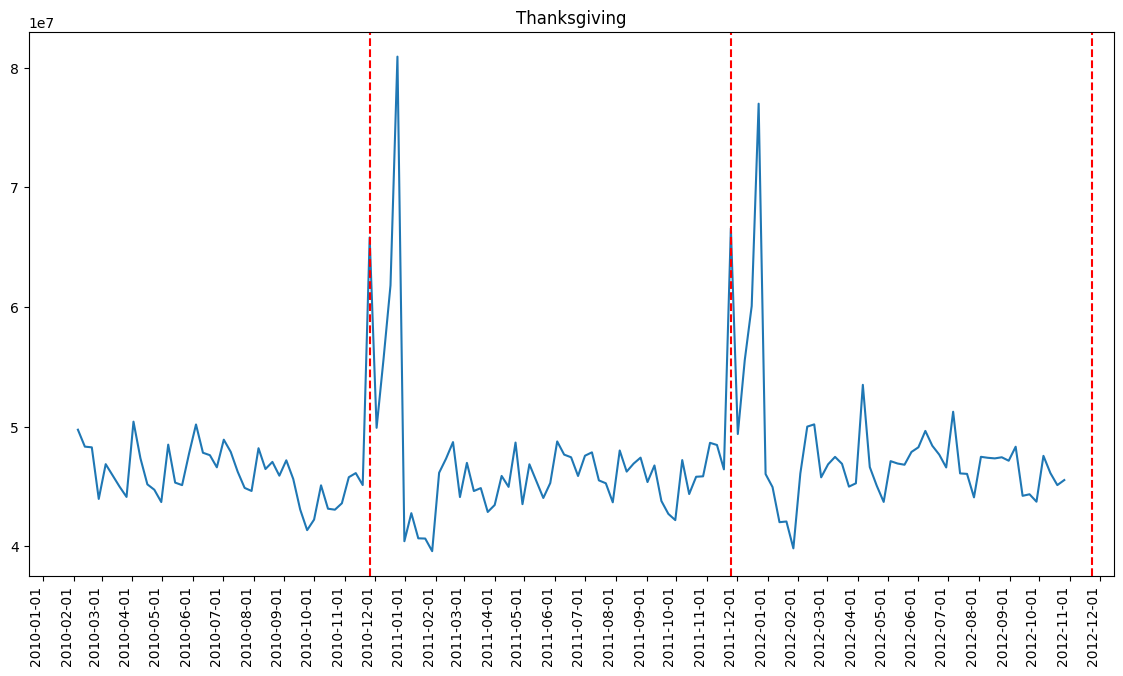

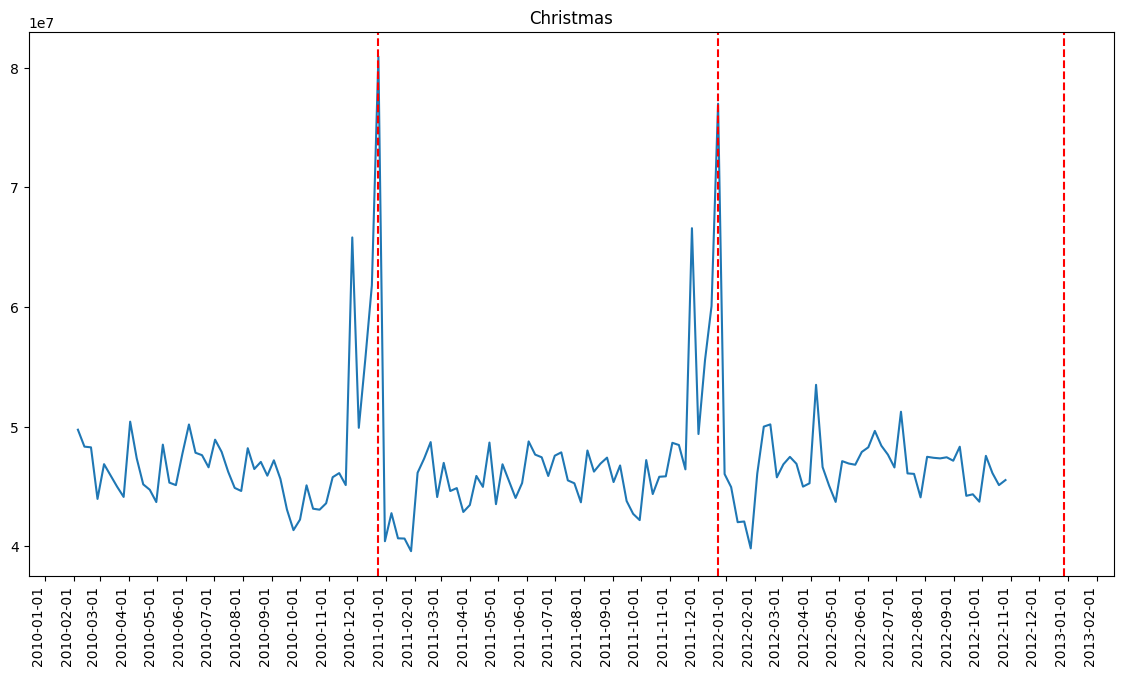

In [408]:
def plot_line(df, holiday_date,holiday_label):
  fig, ax = plt.subplots(figsize=(14,8))
  ax.plot(df['Date'],df['Weekly_Sales'],label=holiday_label)

  for date in holiday_date:
    day = datetime.strptime(date, '%d-%m-%Y')
    plt.axvline(x=day, color='red', linestyle='--')

  plt.title(holiday_label)
  x_dates = df['Date'].dt.strftime('%Y-%m-%d').sort_values().unique()
  xfmt = dates.DateFormatter('%Y-%m-%d')
  ax.xaxis.set_major_formatter(xfmt)
  ax.xaxis.set_major_locator(dates.DayLocator(1))
  plt.gcf().autofmt_xdate(rotation=90)
  plt.show()

total_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
Thanksgiving = ['26-11-2010','25-11-2011','23-11-2012']
Christmas = ['24-12-2010','23-12-2011','28-12-2012']
plot_line(total_sales,Thanksgiving,'Thanksgiving')
plot_line(total_sales,Christmas,'Christmas')



#Sales increase during both Holidays significantly

<Axes: xlabel='Year'>

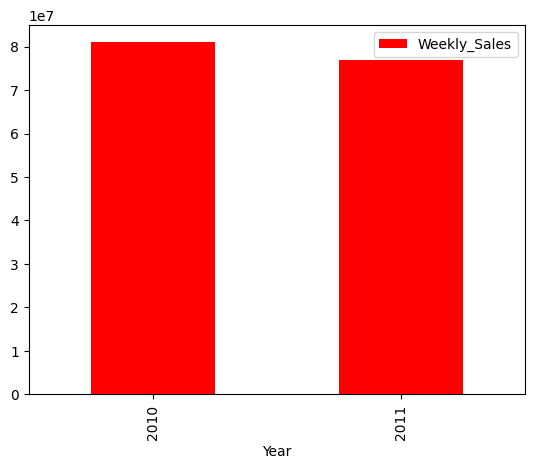

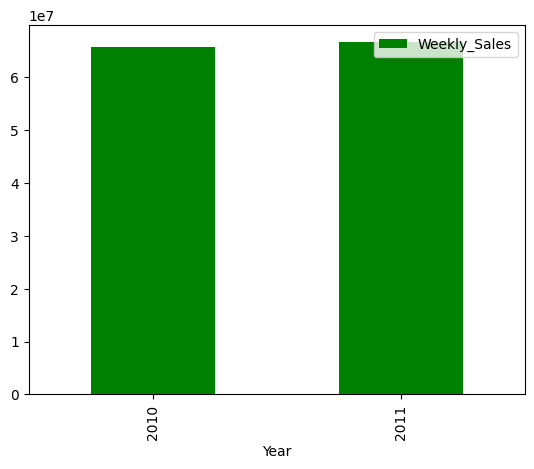

In [409]:
Christmas_df = pd.DataFrame(df.loc[df.Date.isin(Christmas)].groupby('Year')['Weekly_Sales'].sum())
Christmas_df.plot(kind='bar',color='red',label='Christmas')
#Yearly Sales in holidays
Thanksgiving_df = pd.DataFrame(df.loc[df.Date.isin(Thanksgiving)].groupby('Year')['Weekly_Sales'].sum())

Thanksgiving_df.plot(kind='bar',color='green',label='Thanksgiving')
# Thanksgiving_df

In [410]:
import scipy.stats as stats
import statsmodels.api as sm

#Checking the trend and seasonility of Weekly sales

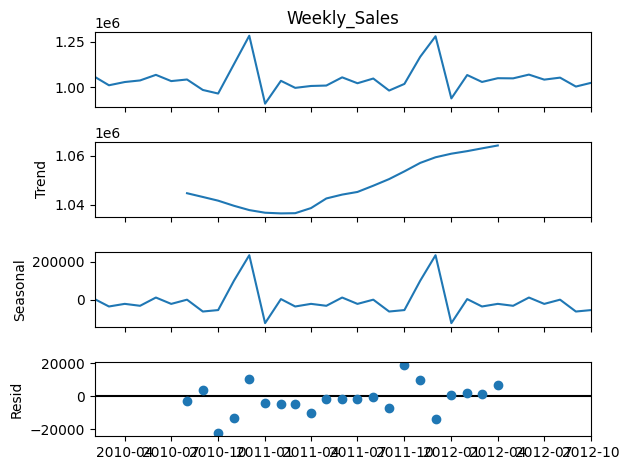

In [411]:
data = df.set_index('Date')

sm.tsa.seasonal_decompose(data['Weekly_Sales'].resample('MS').mean(), model='additive').plot()
plt.show()

#Outliers

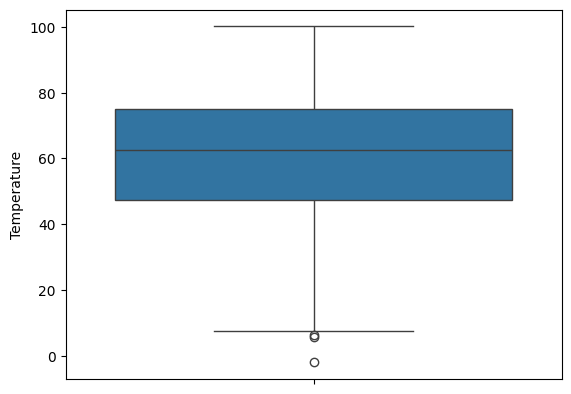

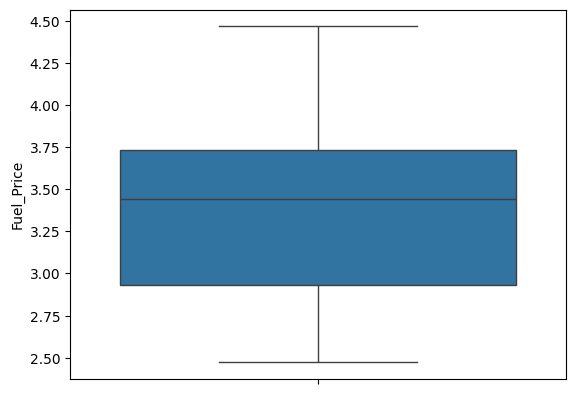

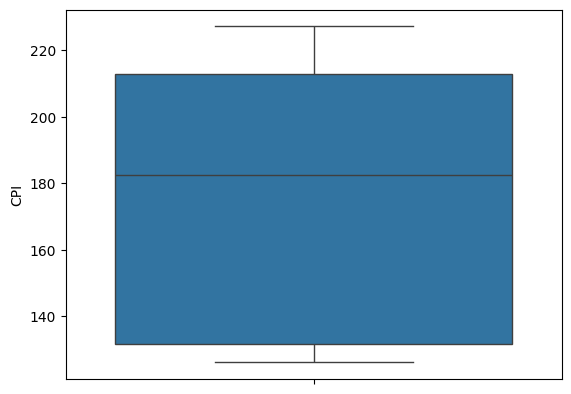

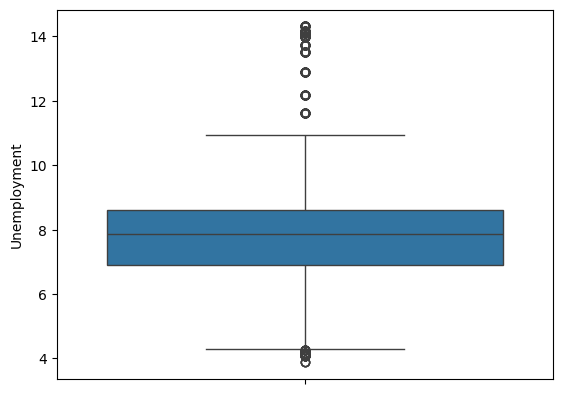

In [412]:
for col in [
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment']:
  sns.boxplot(df[col])
  plt.show()

In [413]:
Q3 = df['Unemployment'].quantile(0.75)
Q1 = df['Unemployment'].quantile(0.25)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Unemployment'] >= lower_bound) & (df['Unemployment'] <= upper_bound)]
Q3 = df['Temperature'].quantile(0.75)
Q1 = df['Temperature'].quantile(0.25)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Temperature'] >= lower_bound) & (df['Temperature'] <= upper_bound)]

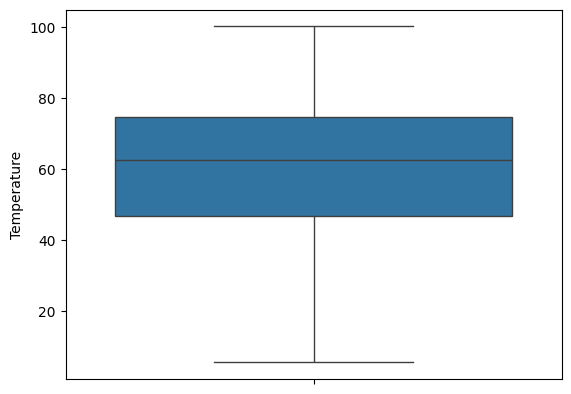

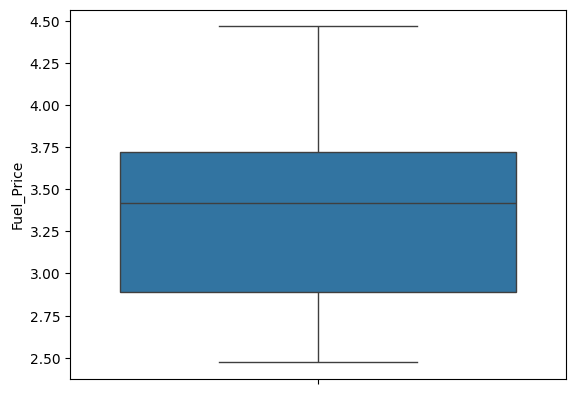

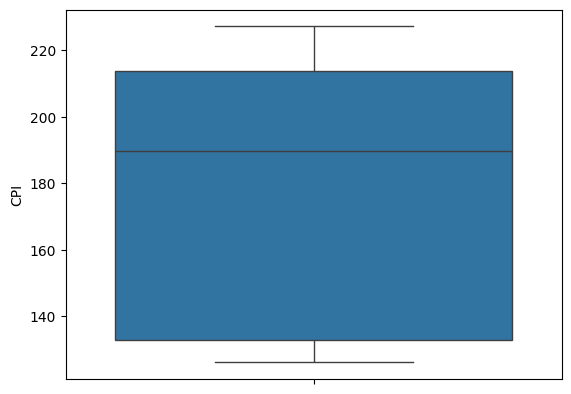

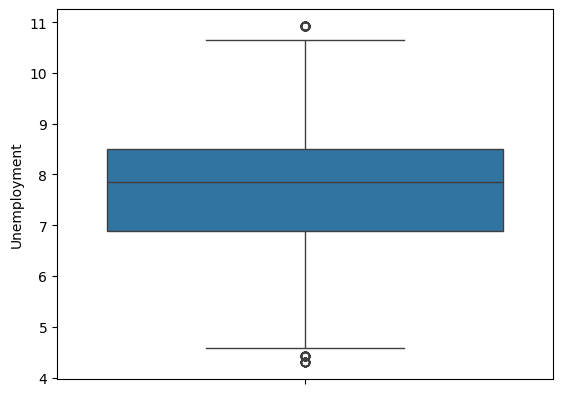

In [414]:
for col in [
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment']:
  sns.boxplot(df[col])
  plt.show()

In [415]:
df.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  Year  Month  Day  
0  211.096358         8.106  2010      2    5  
1  211.242170         8.106  2010      2   12  
2  211.289143         8.106  2010      2   19  
3  211.319643         8.106  2010      2   26  
4  211.350143         8.106  2010      3    5

In [416]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [417]:
X = df.drop(columns=['Weekly_Sales','Date'])
Y = df['Weekly_Sales']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)

Accuracy:96.56450505591847
MAE:54042.82079076404
MSE:11078546959.552202
RMSE:105254.67666356779
R2:0.9657018776546203


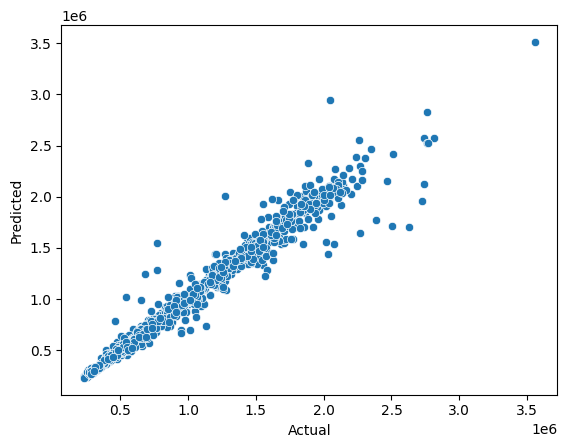

In [418]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print(f'Accuracy:{rf.score(x_test,y_test)*100}')
print(f'MAE:{metrics.mean_absolute_error(y_test,y_pred)}')
print(f'MSE:{metrics.mean_squared_error(y_test,y_pred)}')
print(f'RMSE:{np.sqrt(metrics.mean_squared_error(y_test,y_pred))}')
print(f'R2:{metrics.explained_variance_score(y_test,y_pred)}')
sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Accuracy:98.30771407854509
MAE:45200.57043398405
MSE:5457166828.938389
RMSE:73872.63924443467
R2:0.9830775638302683


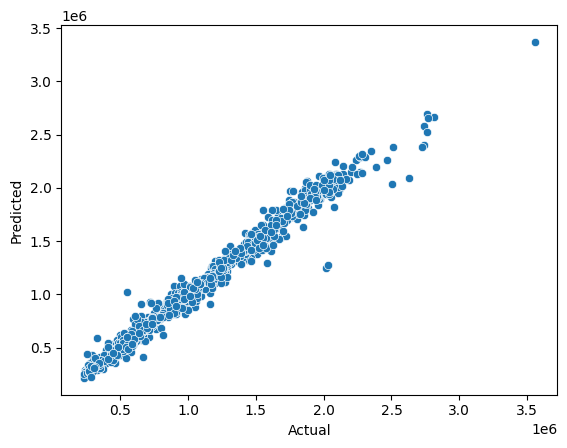

In [419]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
print(f'Accuracy:{xgb.score(x_test,y_test)*100}')
print(f'MAE:{metrics.mean_absolute_error(y_test,y_pred)}')
print(f'MSE:{metrics.mean_squared_error(y_test,y_pred)}')
print(f'RMSE:{np.sqrt(metrics.mean_squared_error(y_test,y_pred))}')
print(f'R2:{metrics.explained_variance_score(y_test,y_pred)}')
sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

#Analysis with respect to particular store

In [420]:
df.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  Year  Month  Day  
0  211.096358         8.106  2010      2    5  
1  211.242170         8.106  2010      2   12  
2  211.289143         8.106  2010      2   19  
3  211.319643         8.106  2010      2   26  
4  211.350143         8.106  2010      3    5

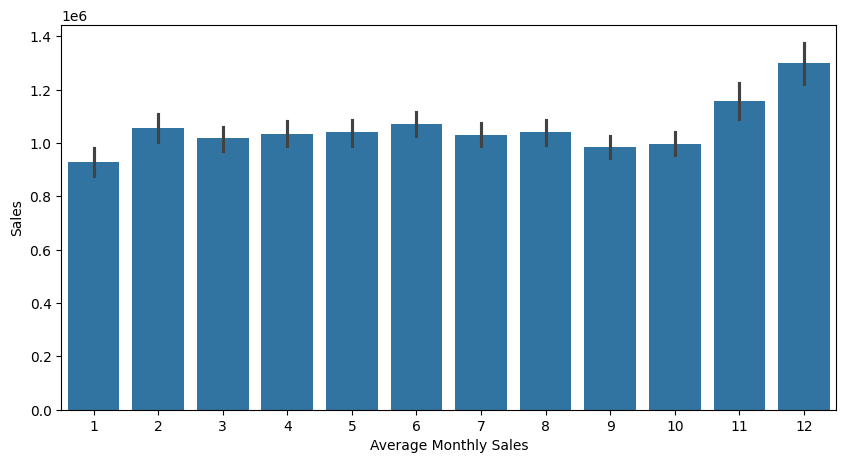

In [421]:
plt.figure(figsize=(10,5))
sns.barplot(x='Month',y='Weekly_Sales',data=df)
plt.ylabel('Sales')
plt.xlabel('Average Monthly Sales')
plt.show()

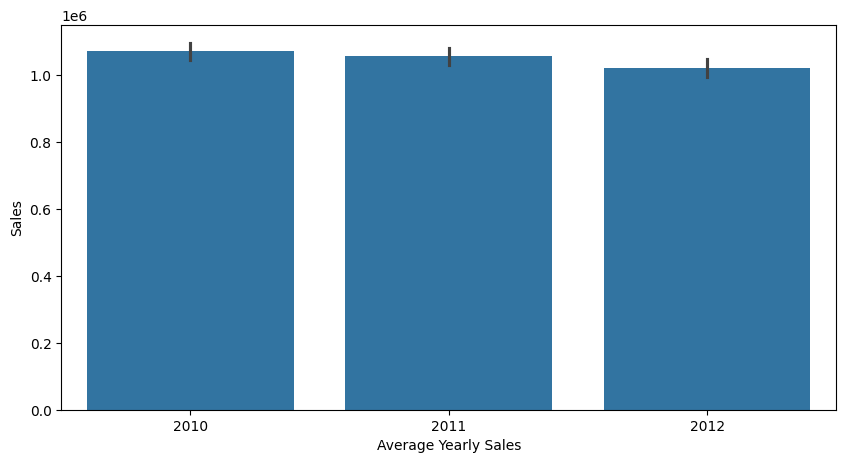

In [422]:
plt.figure(figsize=(10,5))
sns.barplot(x='Year',y='Weekly_Sales',data=df)
plt.ylabel('Sales')
plt.xlabel('Average Yearly Sales')
plt.show()

In [423]:
store_data = df.groupby(['Store'])['Weekly_Sales'].agg(['count','max','sum']).reset_index()
store_data.head()

Store  count         max           sum
0      1    143  2387950.20  2.224028e+08
1      2    143  3436007.68  2.753824e+08
2      3    143   605990.41  5.758674e+07
3      4    126  3676388.98  2.631574e+08
4      5    143   507900.07  4.547569e+07

In [424]:
store_data.sort_values(by='sum',ascending=False,inplace=True)
store_data.head()

Store  count         max           sum
19     20    143  3766687.43  3.013978e+08
13     14    143  3818686.45  2.889999e+08
12     13    143  3595903.20  2.865177e+08
1       2    143  3436007.68  2.753824e+08
9      10    143  3749057.69  2.716177e+08

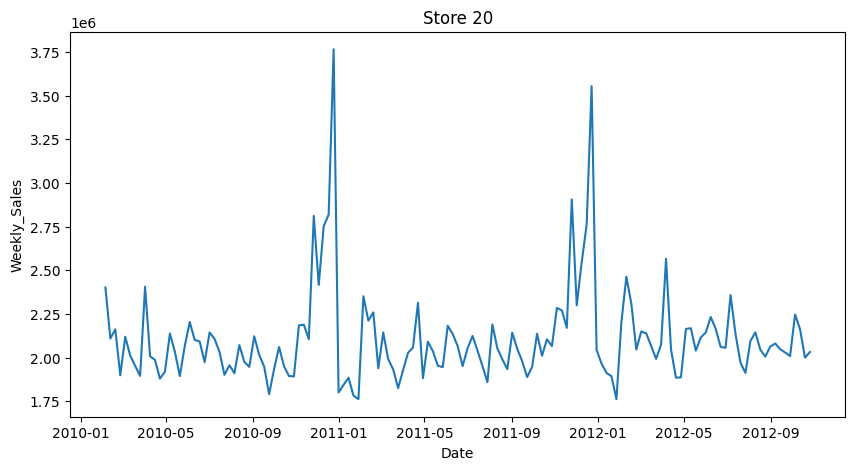

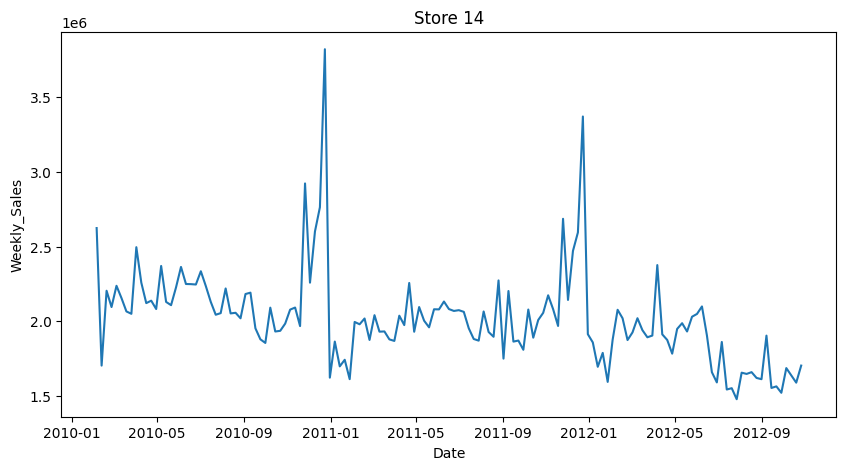

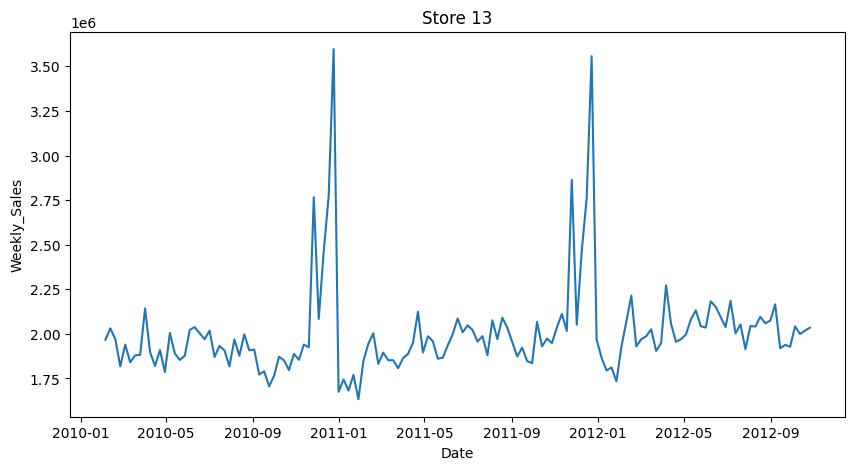

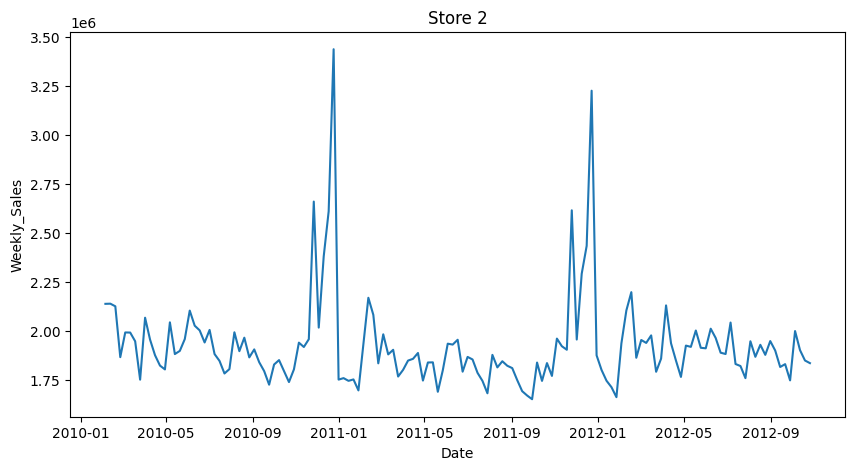

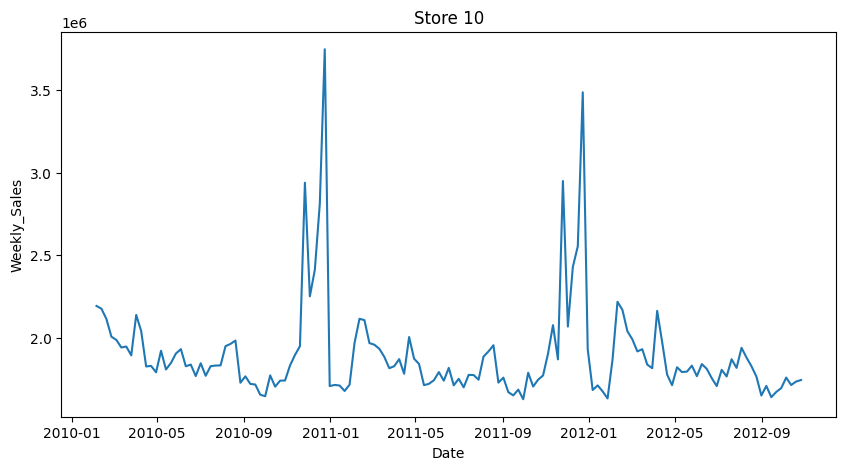

In [425]:
first_10_stores = store_data.head(5)
for store in first_10_stores['Store']:
  plt.figure(figsize=(10,5))
  sns.lineplot(x='Date',y='Weekly_Sales',data=df[df['Store']==store])
  plt.title('Store '+str(store))

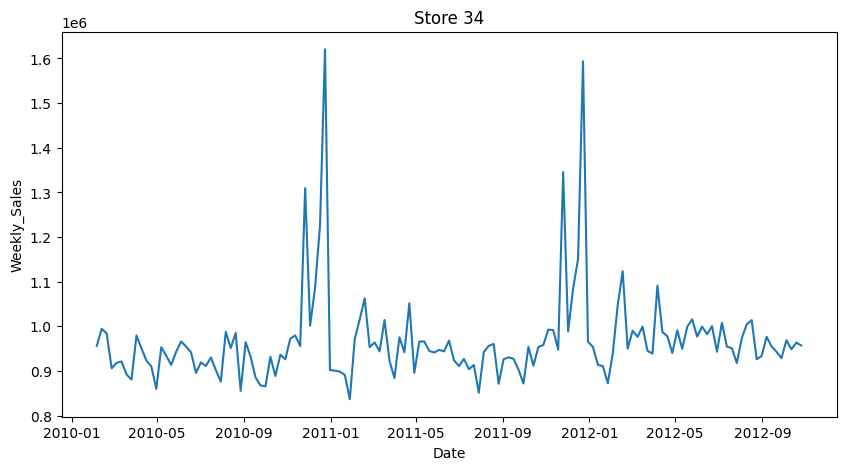

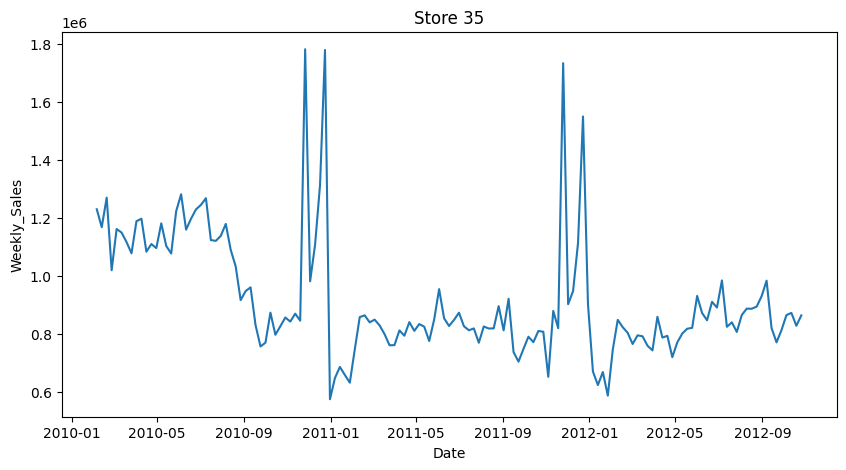

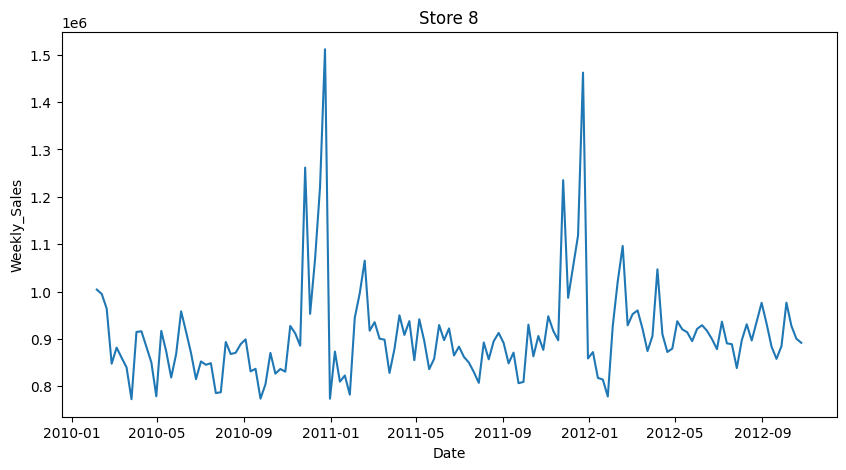

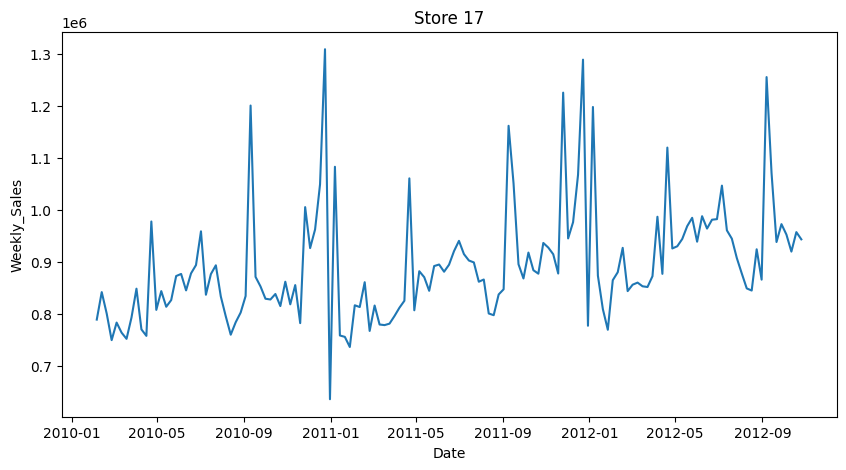

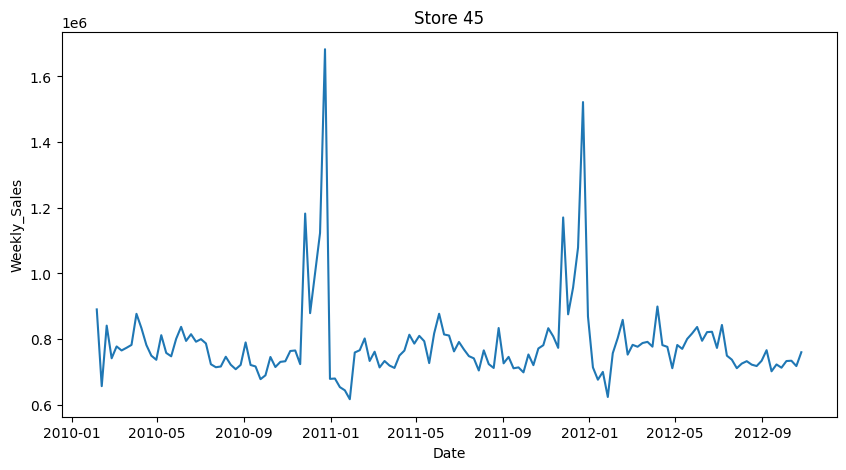

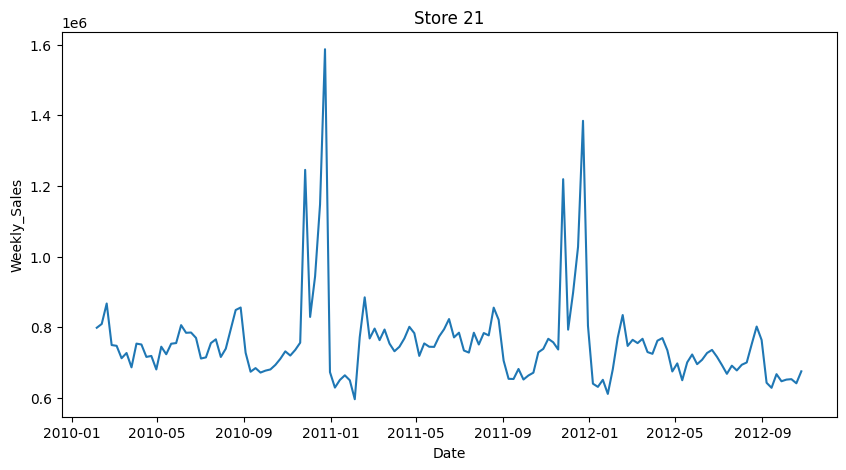

In [426]:
between_5_5_stores = store_data[20:26]
for store in between_5_5_stores['Store']:
  plt.figure(figsize=(10,5))
  sns.lineplot(x='Date',y='Weekly_Sales',data=df[df['Store']==store])
  plt.title('Store '+str(store))
  plt.show()

#Plots from highest and average sales shows similar seasonality and trend but stores with lowest sales differs either in seasonality or trend

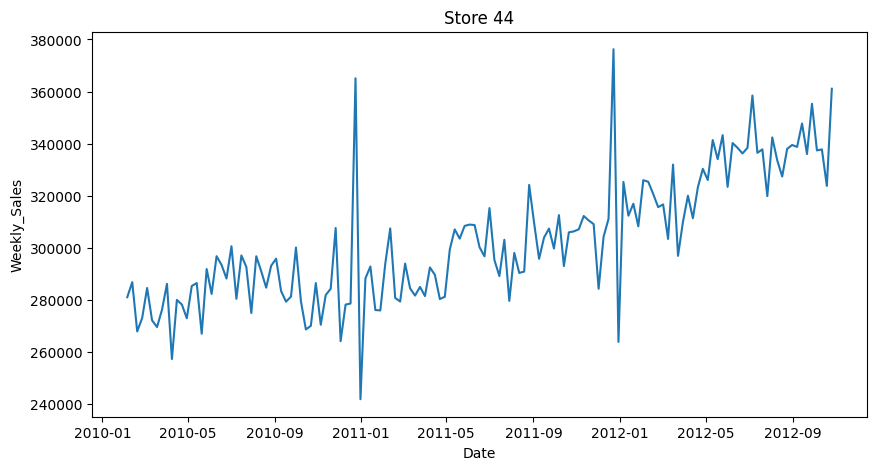

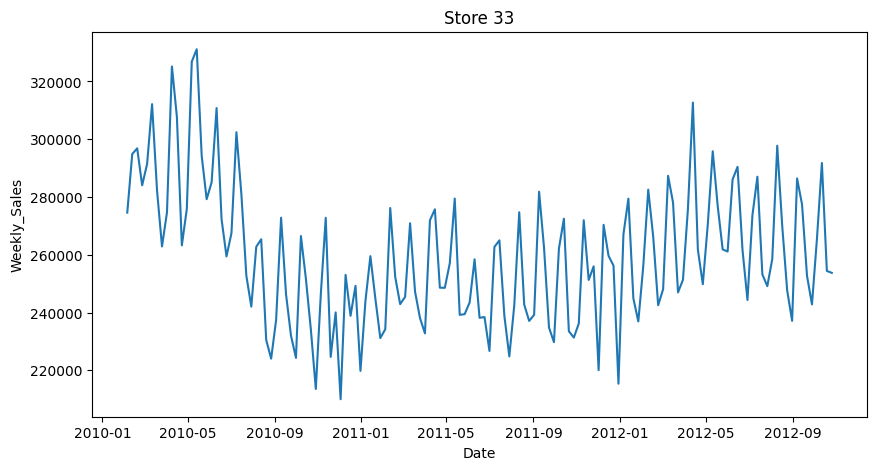

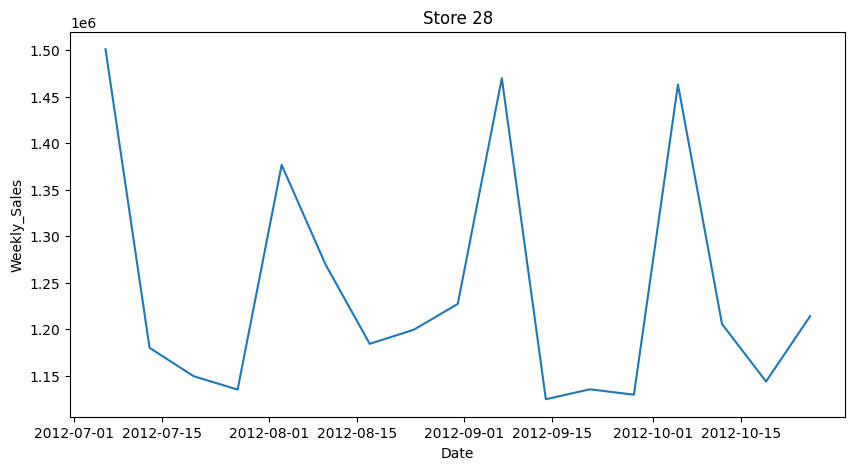

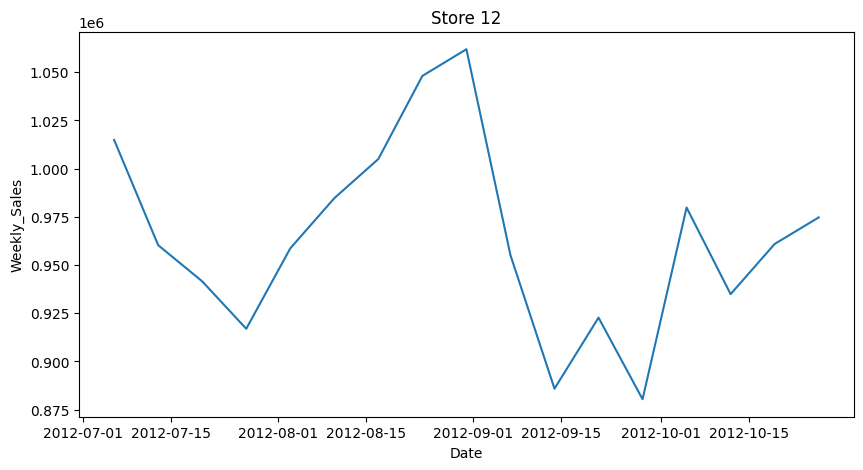

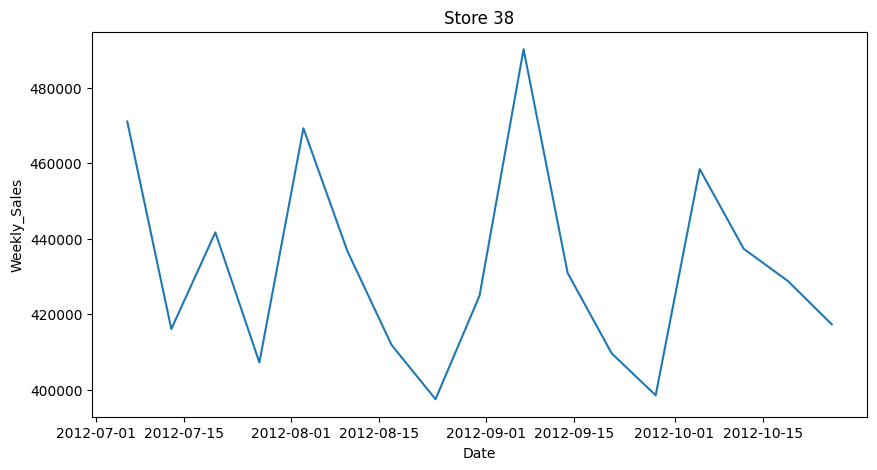

In [427]:
last_10_stores = store_data.tail(5)
for store in last_10_stores['Store']:
  plt.figure(figsize=(10,5))
  sns.lineplot(x='Date',y='Weekly_Sales',data=df[df['Store']==store])
  plt.title('Store '+str(store))
  plt.show()

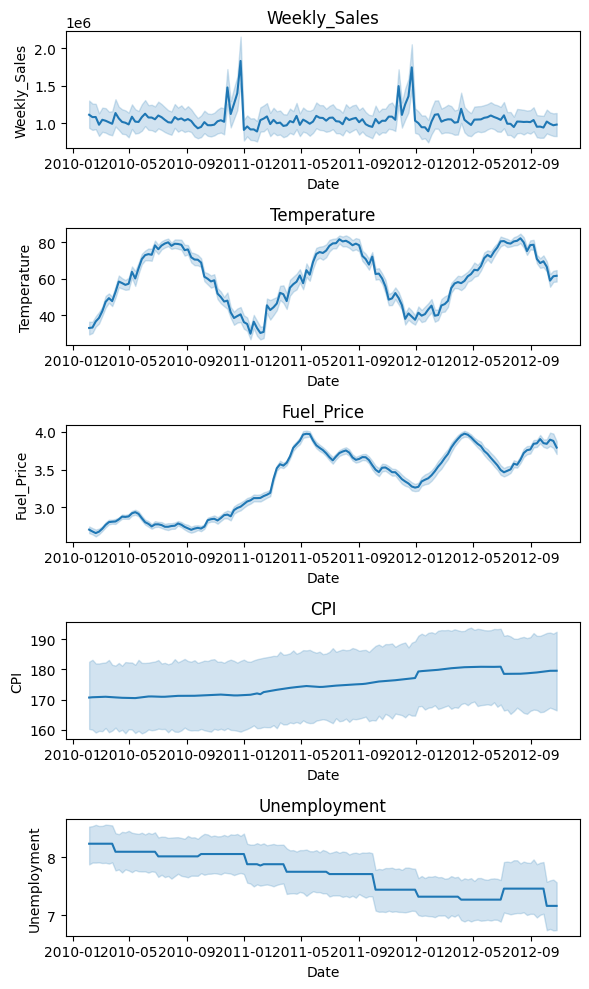

In [428]:

cols = ['Weekly_Sales','Temperature','Fuel_Price', 'CPI', 'Unemployment']
plt.figure(figsize=(6, 10))
i=1
for col in cols:
  plt.subplot(5,1,i)
  sns.lineplot(x='Date',y=col,data=df)
  plt.title(col)
  i+=1
plt.tight_layout()
plt.show()




In [429]:
data_monthly = pd.crosstab(data['Year'],data['Month'],values=data['Weekly_Sales'],aggfunc='sum')
data_monthly

Month            1             2             3             4             5   \
Year                                                                          
2010            NaN  1.903330e+08  1.819198e+08  2.314124e+08  1.867109e+08   
2011   1.637040e+08  1.863313e+08  1.793564e+08  2.265265e+08  1.816482e+08   
2012   1.688945e+08  1.920636e+08  2.315097e+08  1.889209e+08  1.887665e+08   

Month            6             7             8             9             10  \
Year                                                                          
2010   1.922462e+08  2.325801e+08  1.876401e+08  1.772679e+08  2.171618e+08   
2011   1.897734e+08  2.299114e+08  1.885993e+08  2.208477e+08  1.832613e+08   
2012   2.406103e+08  1.875095e+08  2.368508e+08  1.806455e+08  1.843617e+08   

Month            11            12  
Year                               
2010   2.028534e+08  2.887605e+08  
2011   2.101624e+08  2.880781e+08  
2012            NaN           NaN

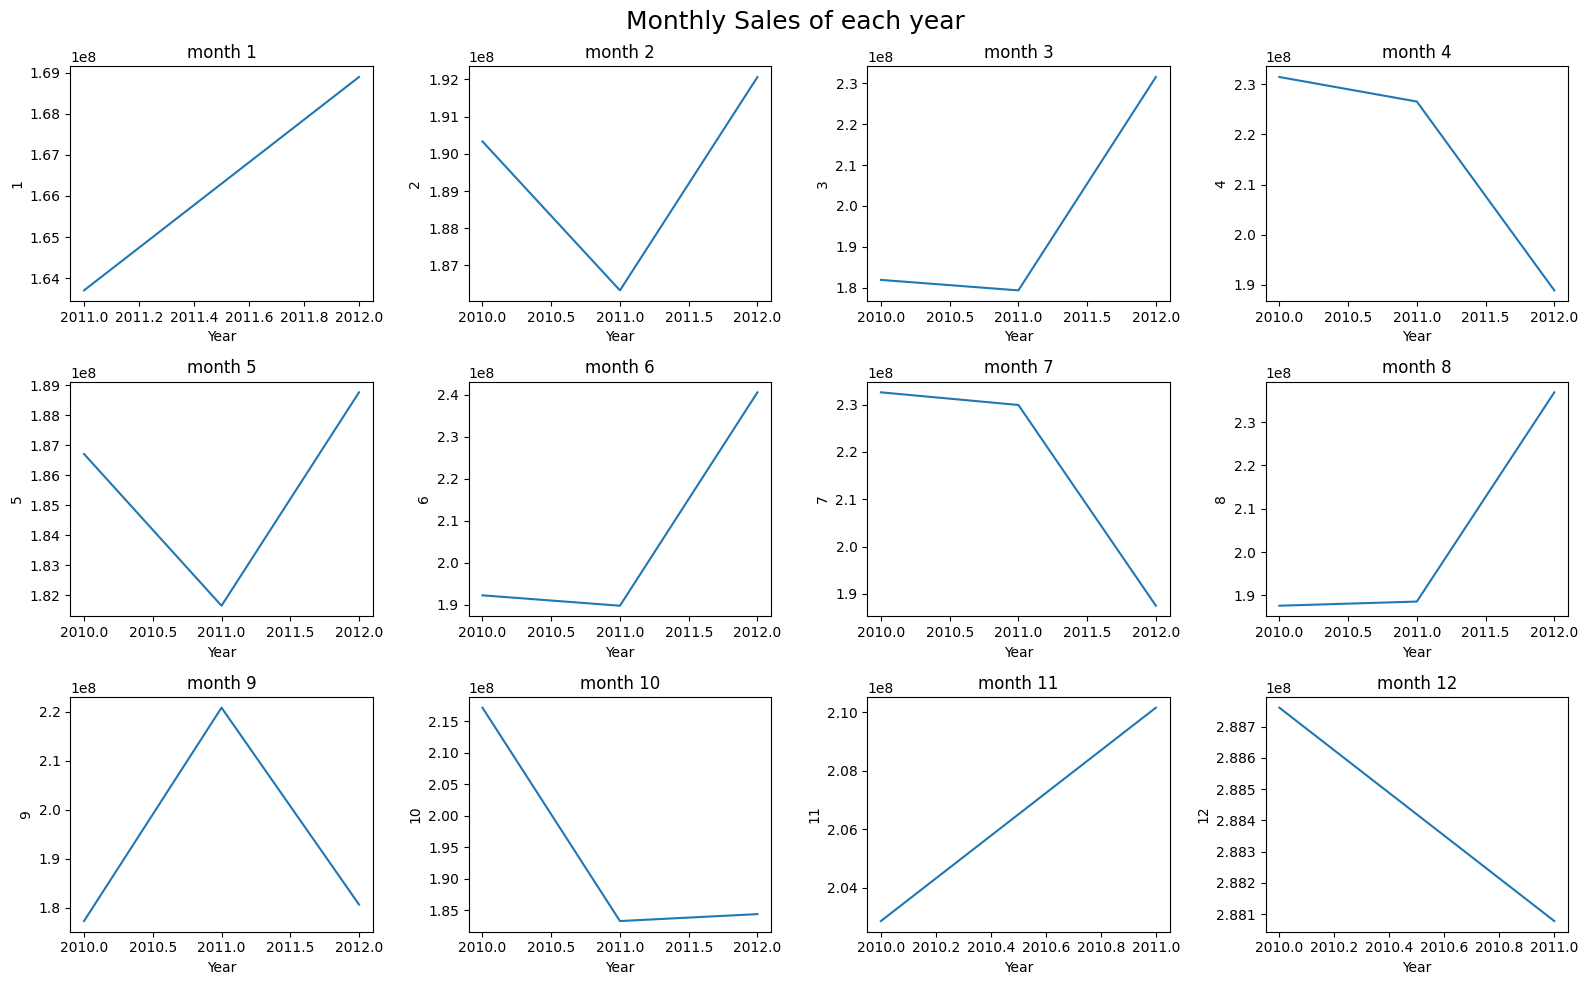

In [430]:
fig,axes = plt.subplots(3,4,figsize=(16,10))
plt.suptitle('Monthly Sales of each year', fontsize=18)
k=1
for i in range(3):
  for j in range(4):
    sns.lineplot(data=data_monthly[k],ax=axes[i][j])
    axes[i][j].set_title('month '+str(k))
    k+=1
plt.tight_layout()
plt.show()

In [431]:
cat_cols = ['Store','Holiday_Flag']
data_cat = data[cat_cols]
data_cat = pd.get_dummies(data_cat,columns=cat_cols)

data_cat_numeric = data_cat.astype(int)

data = pd.concat([data,data_cat_numeric],axis=1)
data.drop(columns=cat_cols,inplace=True)
data.head()

Weekly_Sales  Temperature  Fuel_Price         CPI  Unemployment  \
Date                                                                          
2010-02-05    1643690.90        42.31       2.572  211.096358         8.106   
2010-02-12    1641957.44        38.51       2.548  211.242170         8.106   
2010-02-19    1611968.17        39.93       2.514  211.289143         8.106   
2010-02-26    1409727.59        46.63       2.561  211.319643         8.106   
2010-03-05    1554806.68        46.50       2.625  211.350143         8.106   

            Year  Month  Day  Store_1  Store_2  ...  Store_38  Store_39  \
Date                                            ...                       
2010-02-05  2010      2    5        1        0  ...         0         0   
2010-02-12  2010      2   12        1        0  ...         0         0   
2010-02-19  2010      2   19        1        0  ...         0         0   
2010-02-26  2010      2   26        1        0  ...         0         0   
2010-03-05  2010      3    5        1        0  ...         0         0   

            Store_40  Store_41  Store_42  Store_43  Store_44  Store_45  \
Date                                                                     
2010-02-05         0         0         0         0         0         0   
2010-02-12         0         0         0         0         0         0   
2010-02-19         0         0         0         0         0         0   
2010-02-26         0         0         0         0         0         0   
2010-03-05         0         0         0         0         0         0   

            Holiday_Flag_0  Holiday_Flag_1  
Date                                        
2010-02-05               1               0  
2010-02-12               0               1  
2010-02-19               1               0  
2010-02-26               1               0  
2010-03-05               1               0  

[5 rows x 55 columns]

In [432]:
data.shape

(6435, 55)

In [433]:
num_cols = ['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']

In [434]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])
data.head()

Weekly_Sales  Temperature  Fuel_Price       CPI  Unemployment  \
Date                                                                        
2010-02-05      0.397291     0.434149    0.050100  0.840500      0.405118   
2010-02-12      0.396811     0.396967    0.038076  0.841941      0.405118   
2010-02-19      0.388501     0.410861    0.021042  0.842405      0.405118   
2010-02-26      0.332458     0.476419    0.044589  0.842707      0.405118   
2010-03-05      0.372661     0.475147    0.076653  0.843008      0.405118   

            Year  Month  Day  Store_1  Store_2  ...  Store_38  Store_39  \
Date                                            ...                       
2010-02-05  2010      2    5        1        0  ...         0         0   
2010-02-12  2010      2   12        1        0  ...         0         0   
2010-02-19  2010      2   19        1        0  ...         0         0   
2010-02-26  2010      2   26        1        0  ...         0         0   
2010-03-05  2010      3    5        1        0  ...         0         0   

            Store_40  Store_41  Store_42  Store_43  Store_44  Store_45  \
Date                                                                     
2010-02-05         0         0         0         0         0         0   
2010-02-12         0         0         0         0         0         0   
2010-02-19         0         0         0         0         0         0   
2010-02-26         0         0         0         0         0         0   
2010-03-05         0         0         0         0         0         0   

            Holiday_Flag_0  Holiday_Flag_1  
Date                                        
2010-02-05               1               0  
2010-02-12               0               1  
2010-02-19               1               0  
2010-02-26               1               0  
2010-03-05               1               0  

[5 rows x 55 columns]

In [435]:
data.tail()

Weekly_Sales  Temperature  Fuel_Price       CPI  Unemployment  \
Date                                                                        
2012-09-28      0.139437     0.654990    0.764028  0.651876      0.460514   
2012-10-05      0.145057     0.655088    0.758016  0.653427      0.458884   
2012-10-12      0.145337     0.553131    0.765531  0.654977      0.458884   
2012-10-19      0.140810     0.572701    0.750000  0.655013      0.458884   
2012-10-26      0.152491     0.595988    0.706413  0.654796      0.458884   

            Year  Month  Day  Store_1  Store_2  ...  Store_38  Store_39  \
Date                                            ...                       
2012-09-28  2012      9   28        0        0  ...         0         0   
2012-10-05  2012     10    5        0        0  ...         0         0   
2012-10-12  2012     10   12        0        0  ...         0         0   
2012-10-19  2012     10   19        0        0  ...         0         0   
2012-10-26  2012     10   26        0        0  ...         0         0   

            Store_40  Store_41  Store_42  Store_43  Store_44  Store_45  \
Date                                                                     
2012-09-28         0         0         0         0         0         1   
2012-10-05         0         0         0         0         0         1   
2012-10-12         0         0         0         0         0         1   
2012-10-19         0         0         0         0         0         1   
2012-10-26         0         0         0         0         0         1   

            Holiday_Flag_0  Holiday_Flag_1  
Date                                        
2012-09-28               1               0  
2012-10-05               1               0  
2012-10-12               1               0  
2012-10-19               1               0  
2012-10-26               1               0  

[5 rows x 55 columns]

In [436]:
X = data.drop(columns=['Weekly_Sales','Day'])
Y = data['Weekly_Sales']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_acc = lr.score(X_test,y_test)*100
print("Linear Regressor Accuracy - ",lr_acc)
y_pred = lr.predict(X_test)

from sklearn import metrics
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))
lr_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lr_df

Linear Regressor Accuracy -  93.51737824242099
MAE 0.026260031987559475
MSE 0.0015691779304024816
RMSE 0.03961285057153147
R2 0.9351752061651717


Actual  Predicted
Date                           
2012-08-03  0.544387   0.523302
2012-02-10  0.285105   0.299199
2012-07-06  0.041144   0.015761
2010-08-27  0.420533   0.461633
2010-02-26  0.149517   0.196077
...              ...        ...
2011-11-18  0.368414   0.392104
2011-01-07  0.261482   0.279904
2010-10-22  0.195787   0.237548
2010-10-08  0.074889   0.108559
2011-05-27  0.095283   0.077864

[1287 rows x 2 columns]

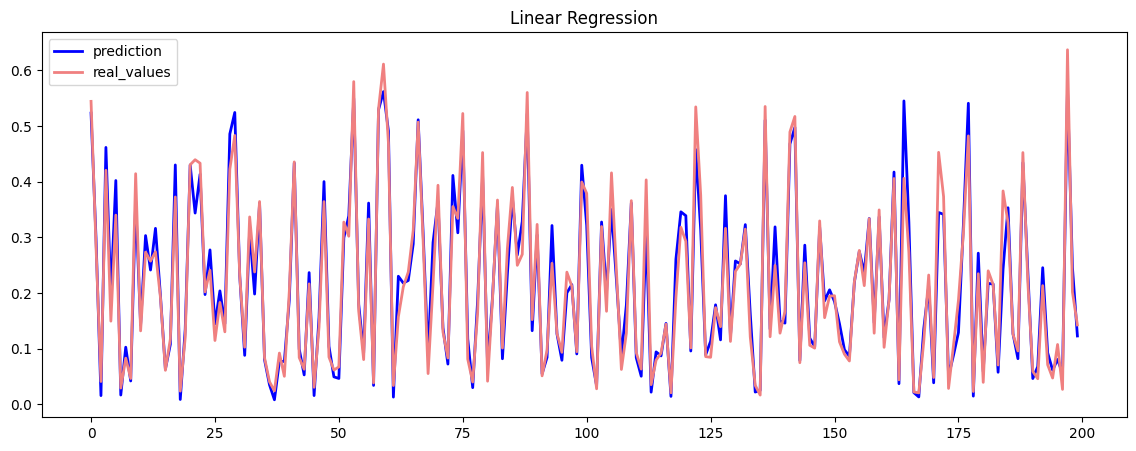

In [437]:
plt.figure(figsize=(14,5))
plt.plot(lr.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Linear Regression")
plt.show()

In [438]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_acc = rf.score(X_test,y_test)*100
print("Random Forest Regressor Accuracy - ",rf_acc)

y_pred = rf.predict(X_test)
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))
rf_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_df


Random Forest Regressor Accuracy -  94.57784493404718
MAE 0.019150802718256782
MSE 0.001312482261480992
RMSE 0.0362281970498256
R2 0.9458544265459158


Actual  Predicted
Date                           
2012-08-03  0.544387   0.525776
2012-02-10  0.285105   0.309341
2012-07-06  0.041144   0.032805
2010-08-27  0.420533   0.482552
2010-02-26  0.149517   0.164691
...              ...        ...
2011-11-18  0.368414   0.420946
2011-01-07  0.261482   0.244458
2010-10-22  0.195787   0.198020
2010-10-08  0.074889   0.071707
2011-05-27  0.095283   0.094456

[1287 rows x 2 columns]

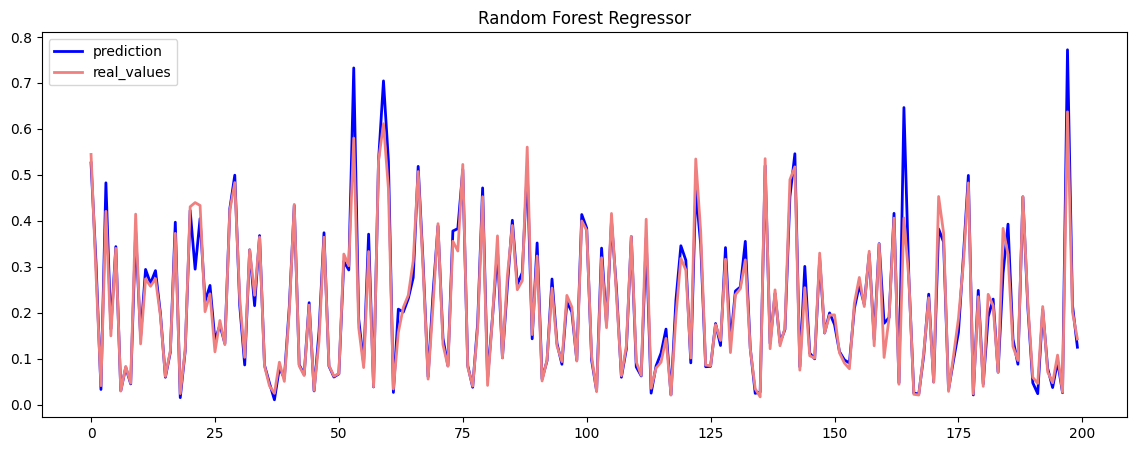

In [439]:
plt.figure(figsize=(14,5))
plt.plot(rf.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Random Forest Regressor")
plt.show()

In [440]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
xgb_acc = xgbr.score(X_test,y_test)*100
print("XGBoost Regressor Accuracy - ",xgb_acc)

y_pred = xgbr.predict(X_test)
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))
xgb_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
xgb_df


XGBoost Regressor Accuracy -  95.75293941634355
MAE 0.017766448911556494
MSE 0.001028039886665369
RMSE 0.032063061093185866
R2 0.9576556188633631


Actual  Predicted
Date                           
2012-08-03  0.544387   0.531010
2012-02-10  0.285105   0.264231
2012-07-06  0.041144   0.035275
2010-08-27  0.420533   0.451982
2010-02-26  0.149517   0.171231
...              ...        ...
2011-11-18  0.368414   0.392566
2011-01-07  0.261482   0.252611
2010-10-22  0.195787   0.190127
2010-10-08  0.074889   0.074611
2011-05-27  0.095283   0.089851

[1287 rows x 2 columns]

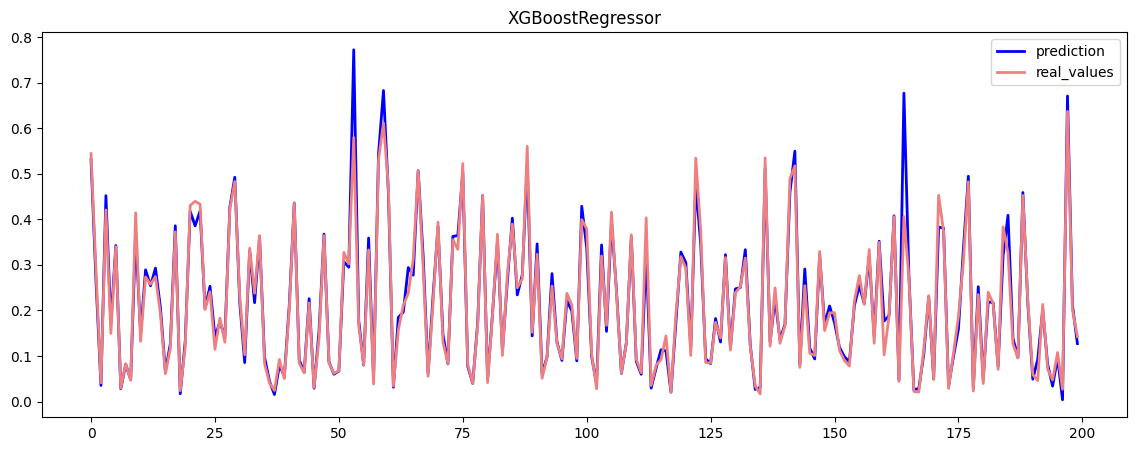

In [441]:
plt.figure(figsize=(14,5))
plt.plot(xgbr.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("XGBoostRegressor")
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


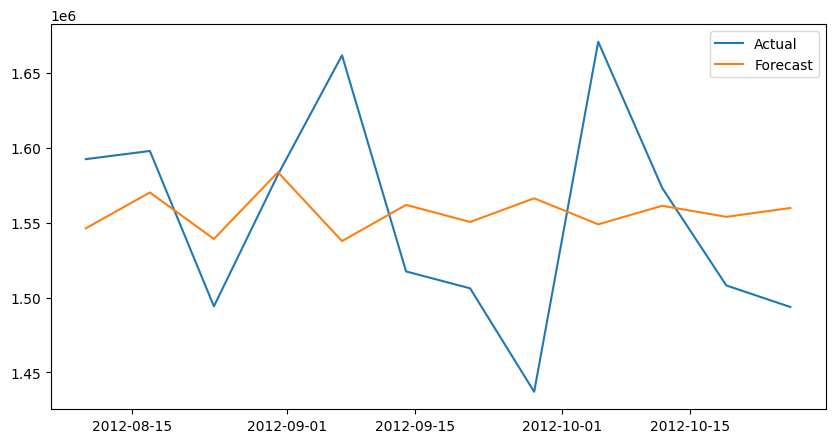

In [442]:
from statsmodels.tsa.arima.model import ARIMA
data = pd.read_csv('sample_data/Walmart.csv')

data['Date'] = pd.to_datetime(data['Date'],format='%d-%m-%Y')

weekly_sales = data.groupby(['Store','Date'])['Weekly_Sales'].sum().reset_index()

store_sales = weekly_sales.pivot(index='Date',columns='Store',values='Weekly_Sales')
store1_sales = store_sales[1]
store1_sales.index = pd.to_datetime(store1_sales.index)
train = store1_sales[:-12]
test = store1_sales[-12:]
model = ARIMA(train,order=(5,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=12)
plt.figure(figsize=(10,5))
plt.plot(test,label='Actual')
plt.plot(forecast,label='Forecast')
plt.legend()
plt.show()

In [443]:
weekly_sales = data.groupby(['Store','Date'])['Weekly_Sales'].sum().reset_index()
store1_sales = weekly_sales[weekly_sales['Store']==1]
store1_sales = store1_sales[['Date','Weekly_Sales']]
store1_sales.columns = ['ds','y']
store1_sales['ds'] = pd.to_datetime(store1_sales['ds'])

In [444]:
!pip install prophet

In [445]:
from prophet import Prophet
import logging
logging.getLogger('prophet').setLevel(logging.ERROR)
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)

model = Prophet(interval_width=0.95)
model.fit(store1_sales)
future_weeks = model.make_future_dataframe(periods=12,freq='W')
forecast = model.predict(future_weeks)
forecast.head()

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0 2010-02-05  1.483588e+06  1.362619e+06  1.776110e+06  1.483588e+06   
1 2010-02-12  1.484651e+06  1.436398e+06  1.834764e+06  1.484651e+06   
2 2010-02-19  1.485713e+06  1.375766e+06  1.792126e+06  1.485713e+06   
3 2010-02-26  1.486776e+06  1.315003e+06  1.734500e+06  1.486776e+06   
4 2010-03-05  1.487838e+06  1.274742e+06  1.691504e+06  1.487838e+06   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  1.483588e+06    92035.010505          92035.010505          92035.010505   
1  1.484651e+06   145657.018941         145657.018941         145657.018941   
2  1.485713e+06   102501.917671         102501.917671         102501.917671   
3  1.486776e+06    35794.834355          35794.834355          35794.834355   
4  1.487838e+06      650.782406            650.782406            650.782406   

          yearly   yearly_lower   yearly_upper  multiplicative_terms  \
0   92035.010505   92035.010505   92035.010505                   0.0   
1  145657.018941  145657.018941  145657.018941                   0.0   
2  102501.917671  102501.917671  102501.917671                   0.0   
3   35794.834355   35794.834355   35794.834355                   0.0   
4     650.782406     650.782406     650.782406                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                         0.0                         0.0  1.575623e+06  
1                         0.0                         0.0  1.630308e+06  
2                         0.0                         0.0  1.588215e+06  
3                         0.0                         0.0  1.522570e+06  
4                         0.0                         0.0  1.488489e+06

In [446]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          155 non-null    datetime64[ns]
 1   trend                       155 non-null    float64       
 2   yhat_lower                  155 non-null    float64       
 3   yhat_upper                  155 non-null    float64       
 4   trend_lower                 155 non-null    float64       
 5   trend_upper                 155 non-null    float64       
 6   additive_terms              155 non-null    float64       
 7   additive_terms_lower        155 non-null    float64       
 8   additive_terms_upper        155 non-null    float64       
 9   yearly                      155 non-null    float64       
 10  yearly_lower                155 non-null    float64       
 11  yearly_upper                155 non-null    float64       

In [447]:
forecast[['yhat','yhat_lower','yhat_upper']] = forecast[['yhat','yhat_lower','yhat_upper']].astype(int)

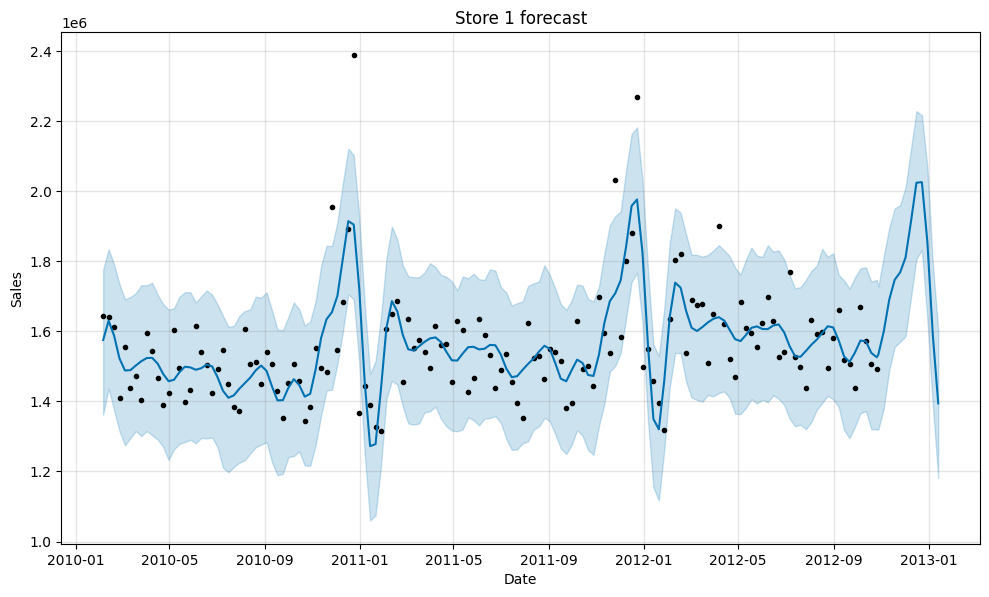

In [448]:
sales_forecast = model.plot(forecast)
plt.title('Store 1 forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

#1) Store 36 and 43 forecasting indicates the sales are decreasing with the time and
#2) Store 30, 33, 37 and 42 forecat indicate the sales are irregular with the time
#3)Store 40 even though doesnt have the seasonality but sales increases with time


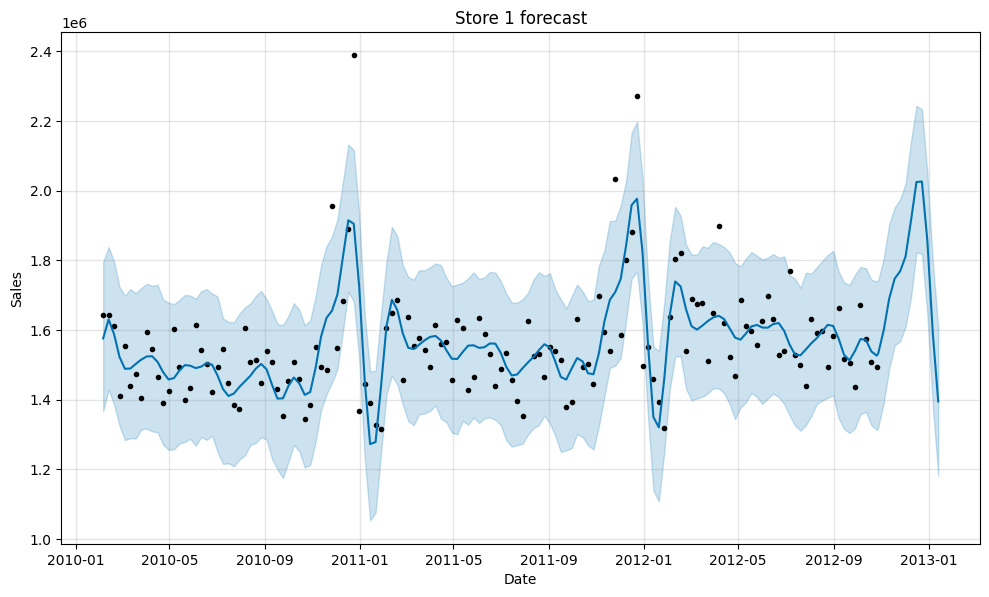

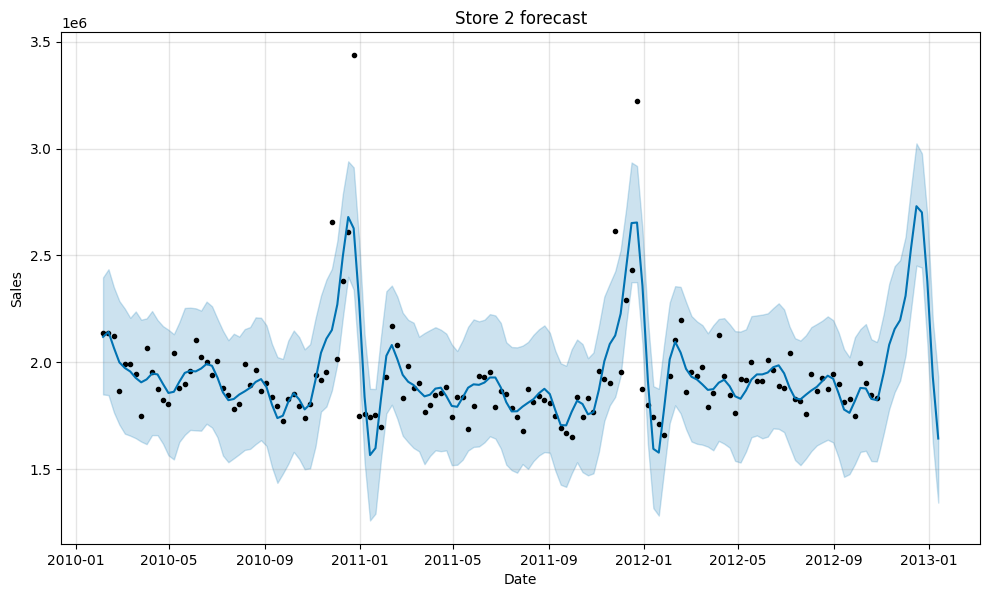

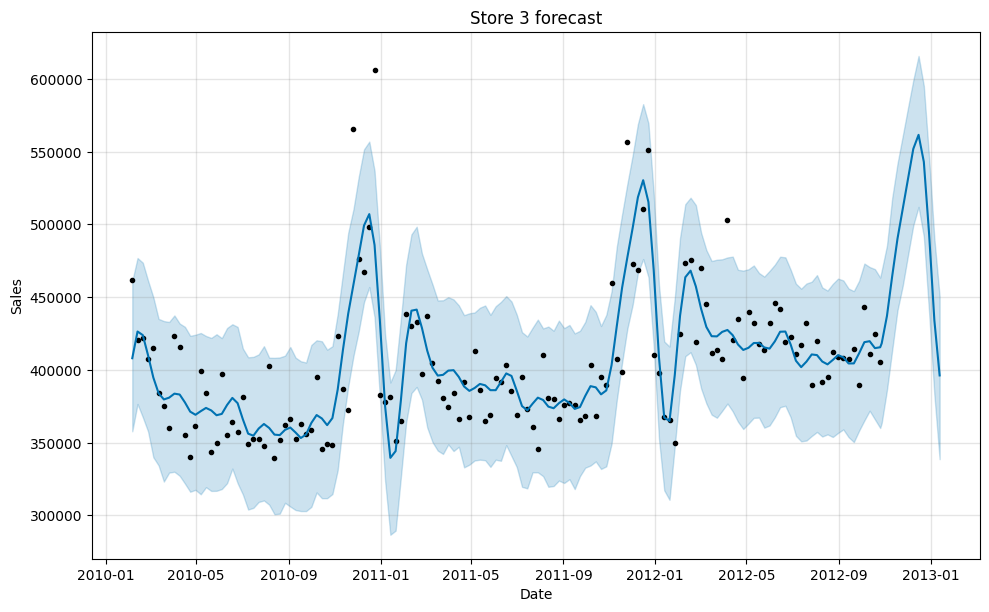

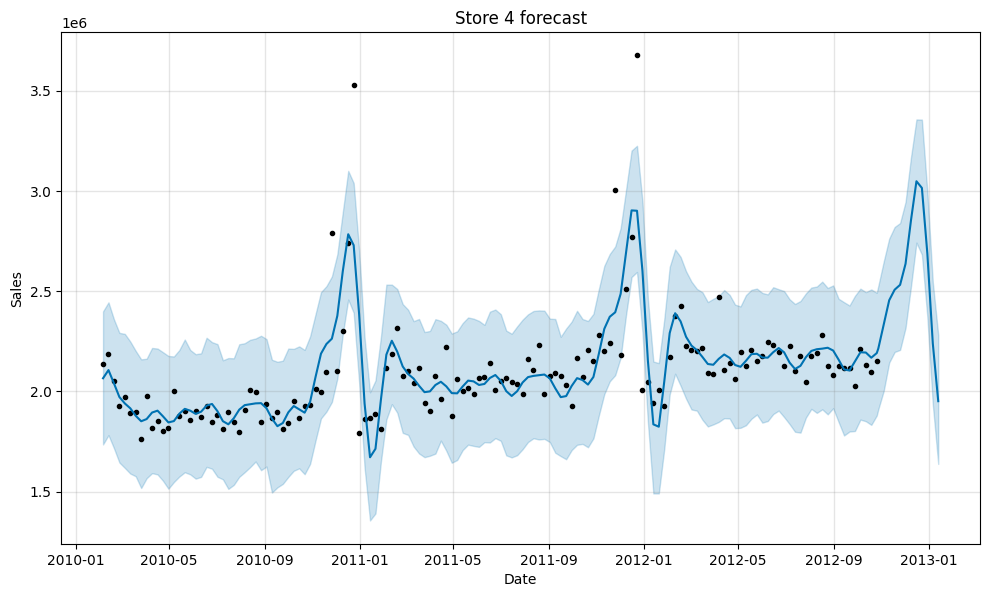

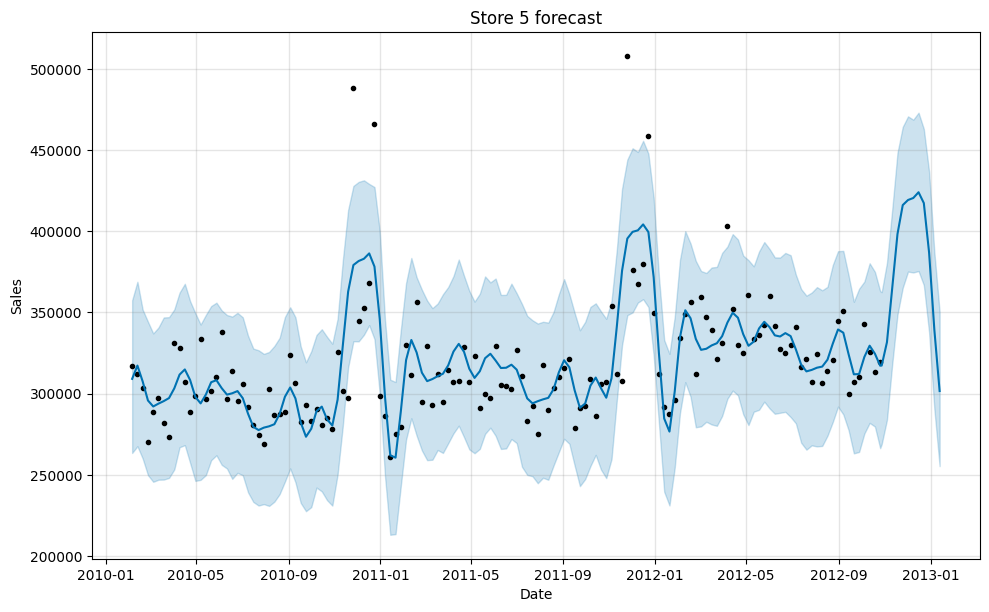

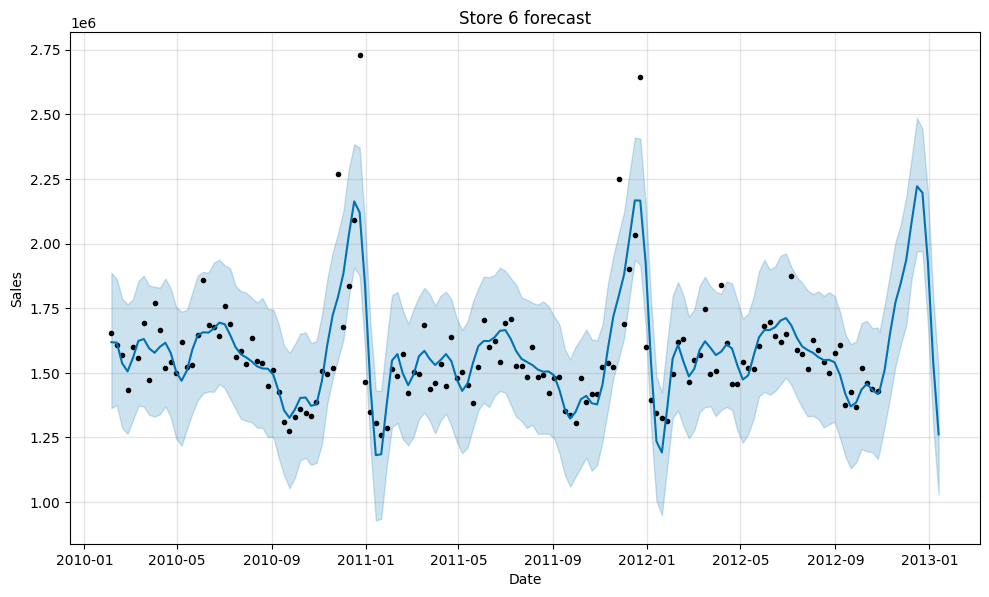

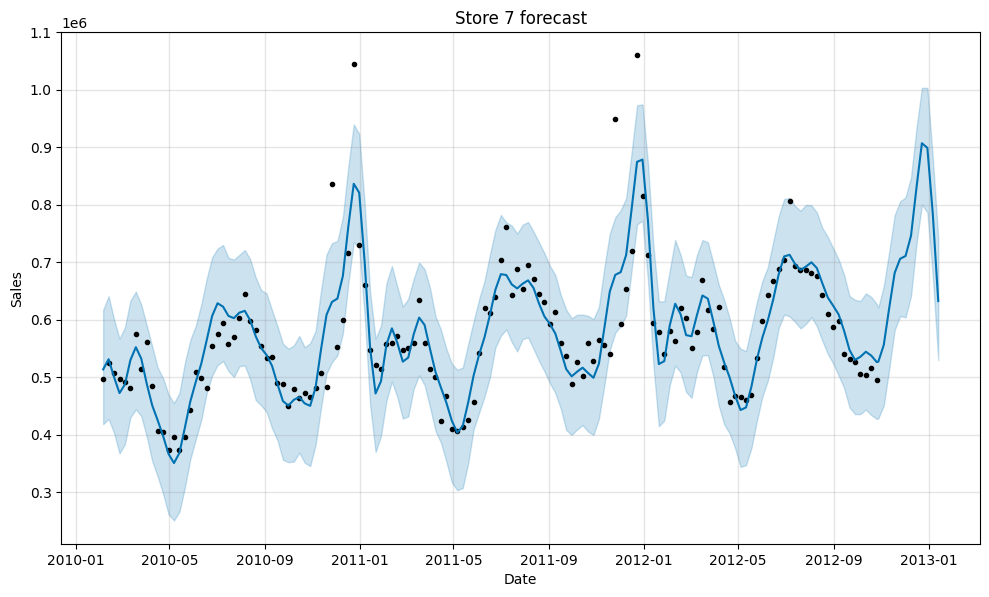

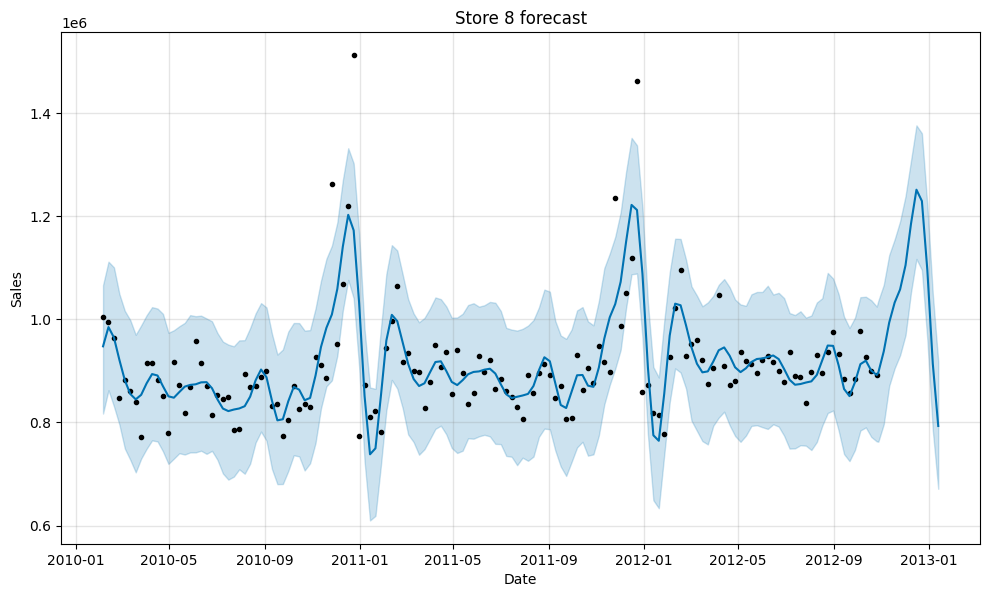

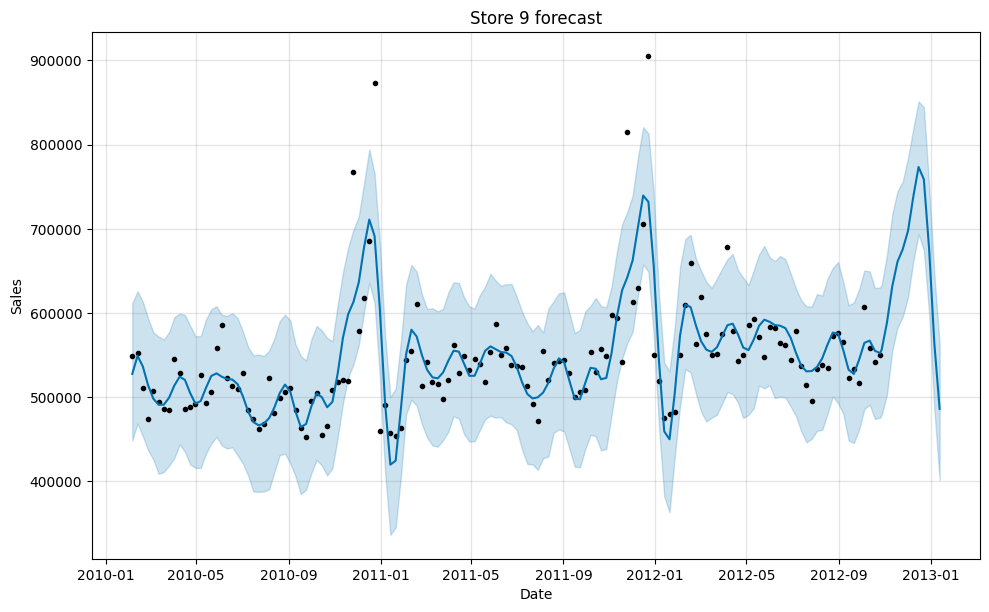

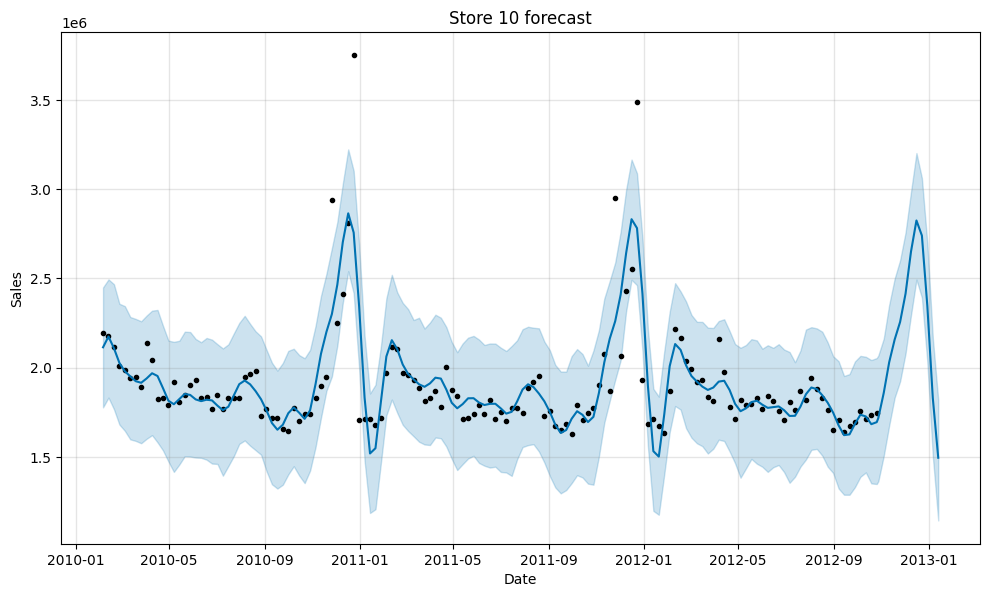

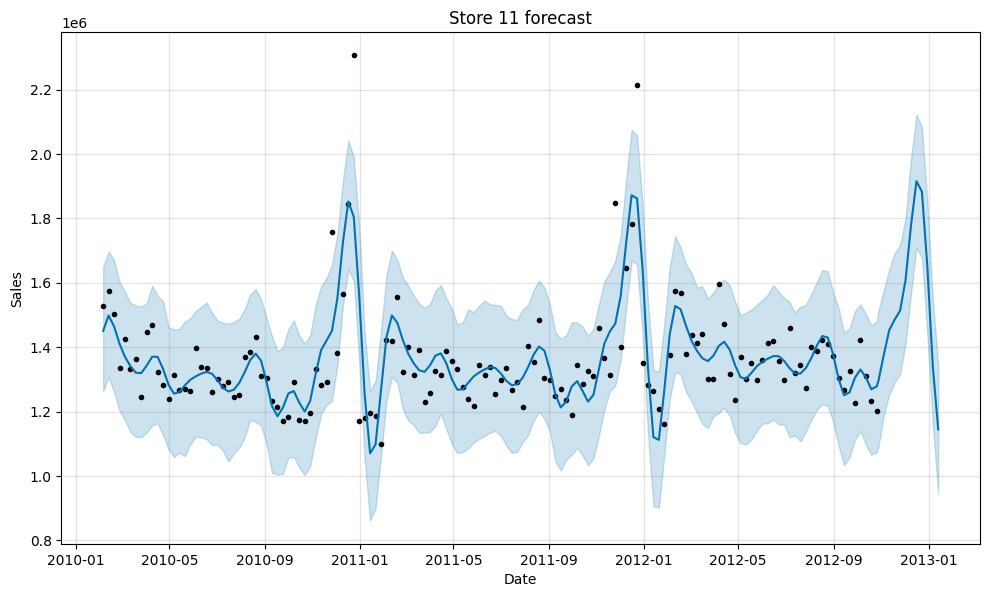

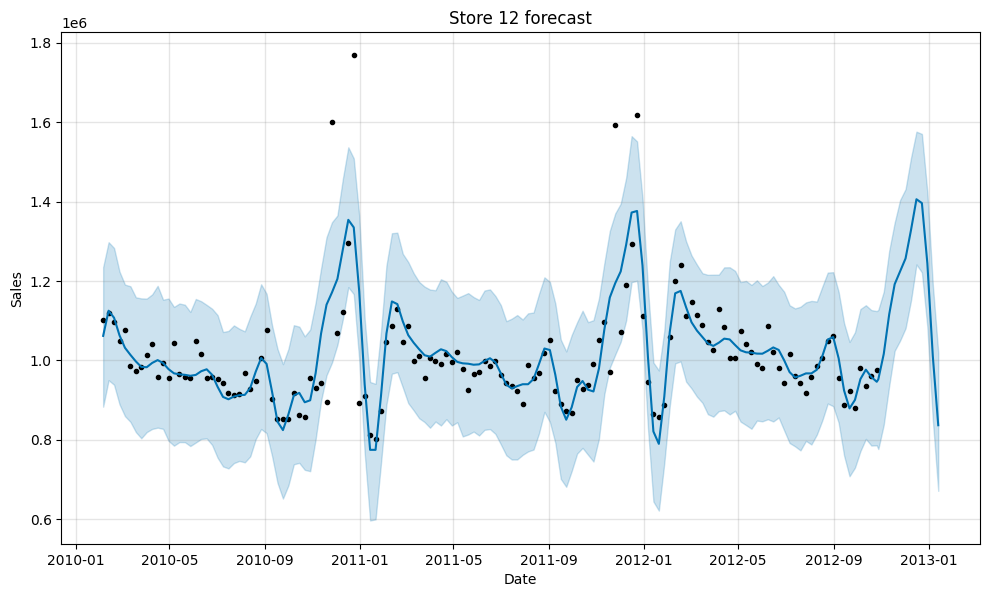

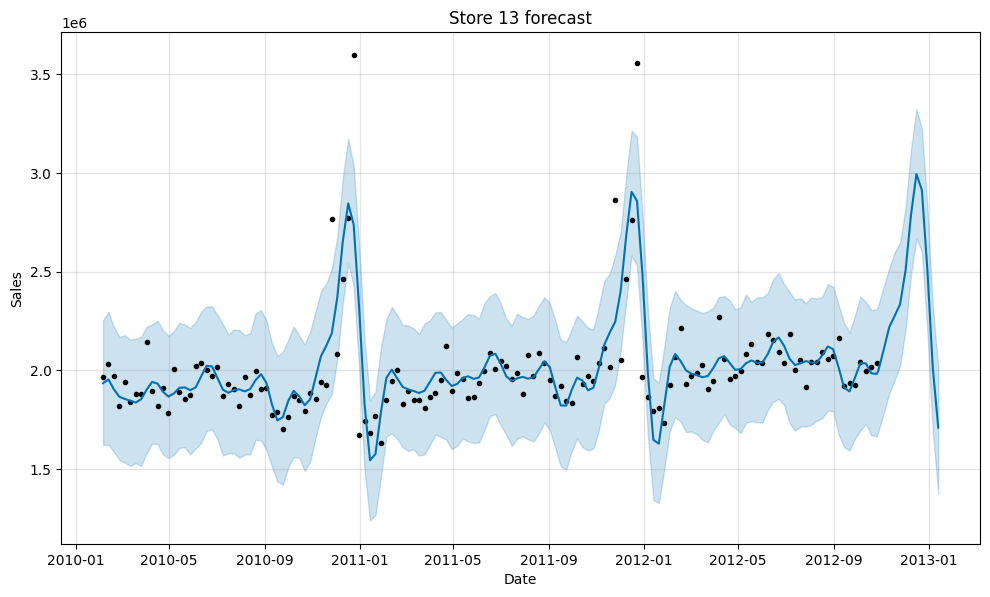

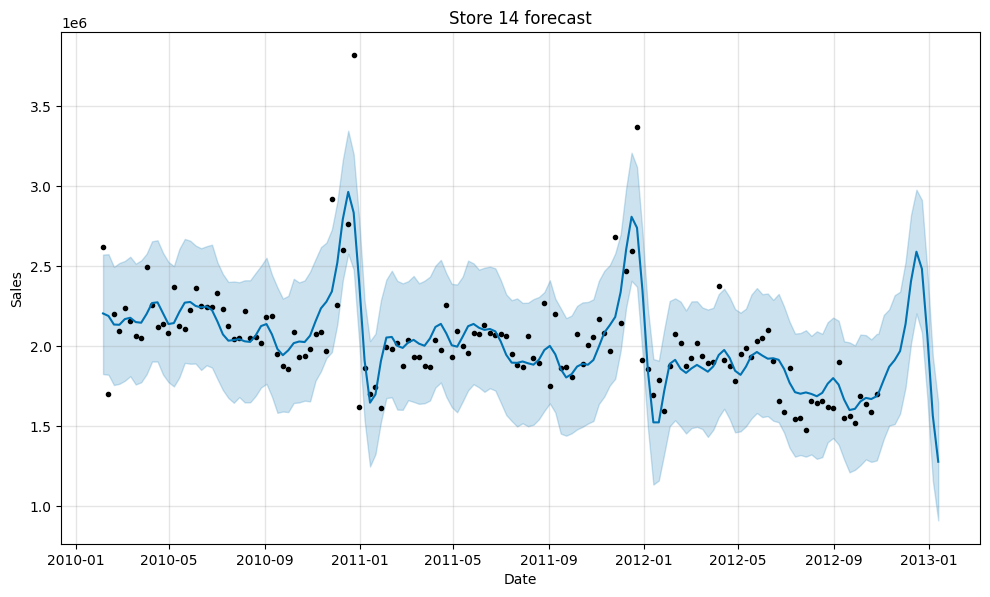

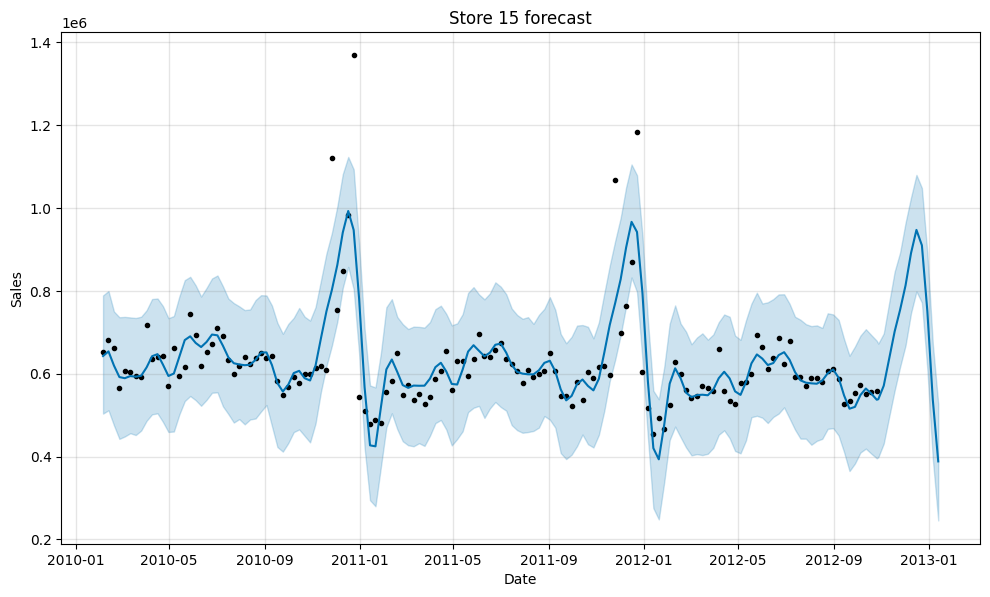

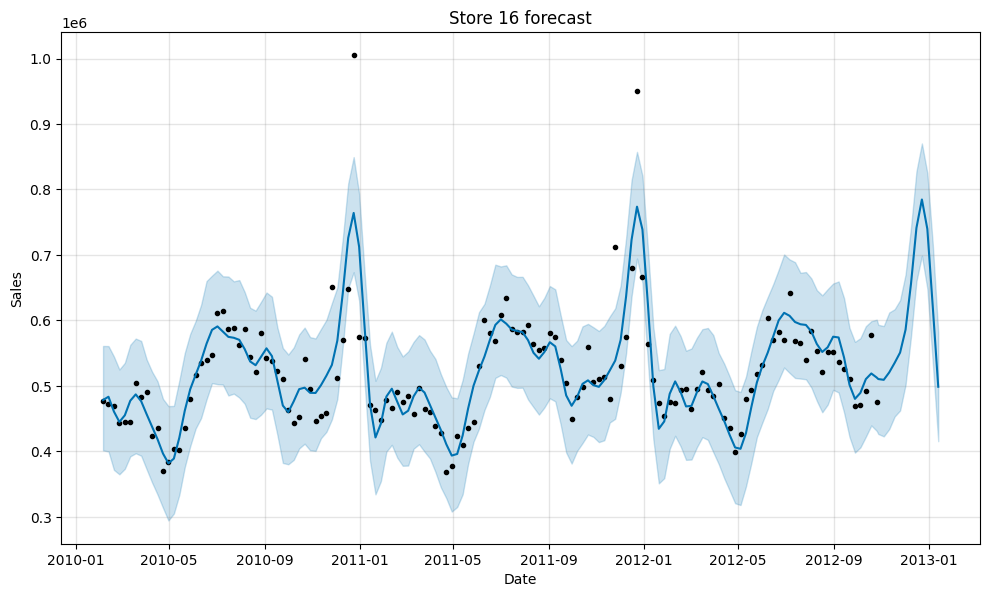

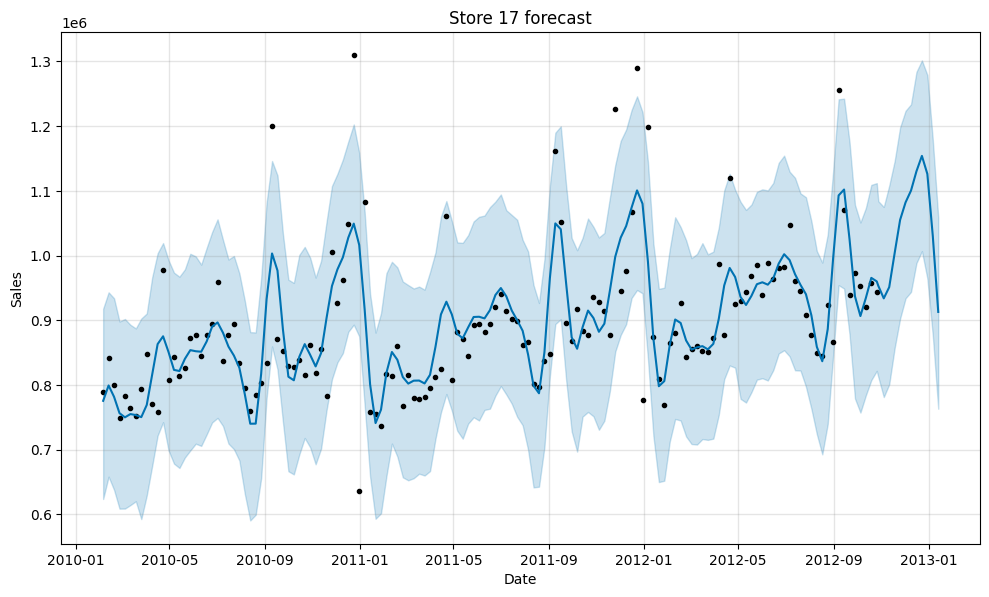

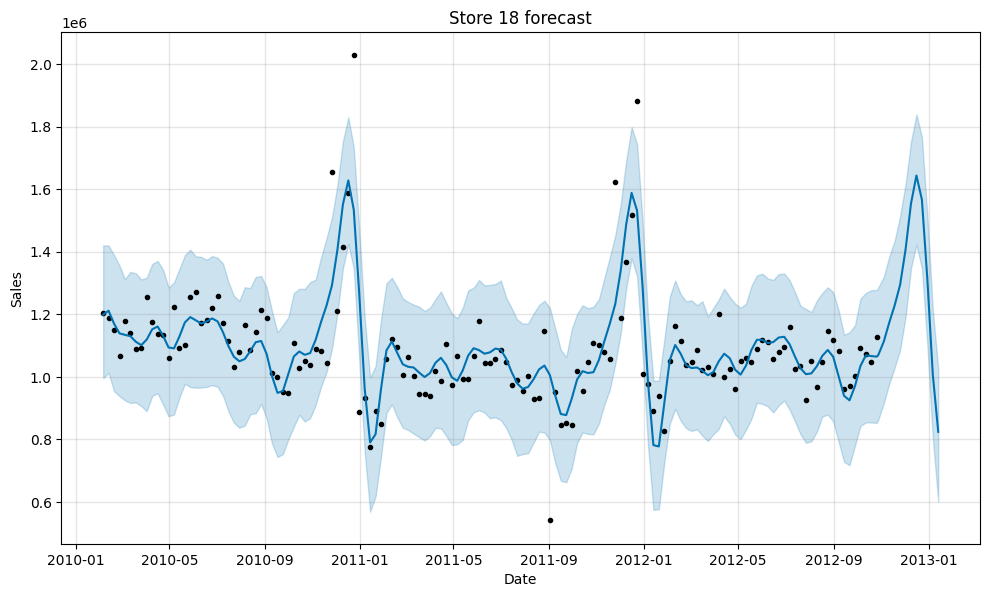

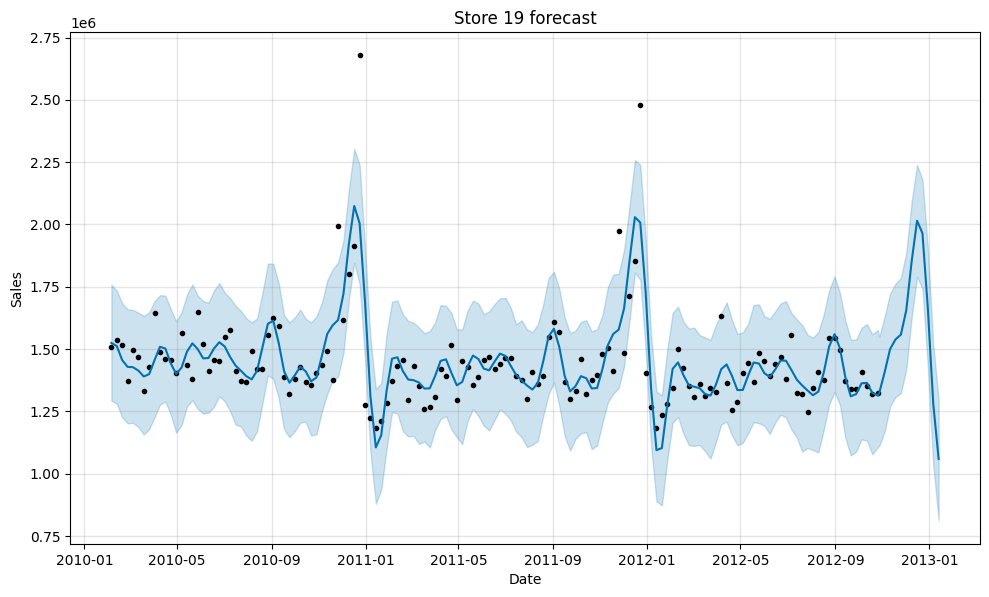

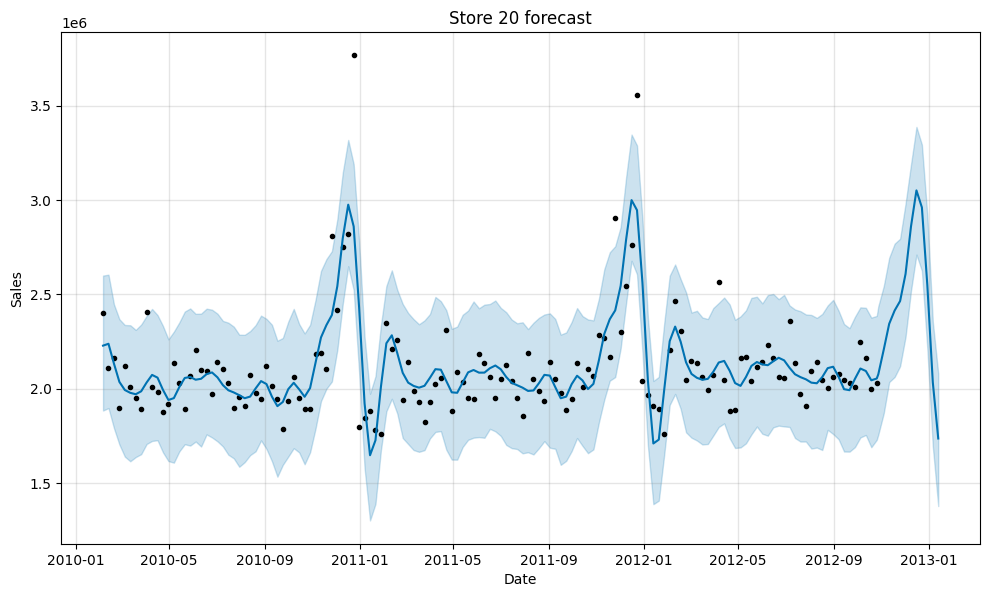

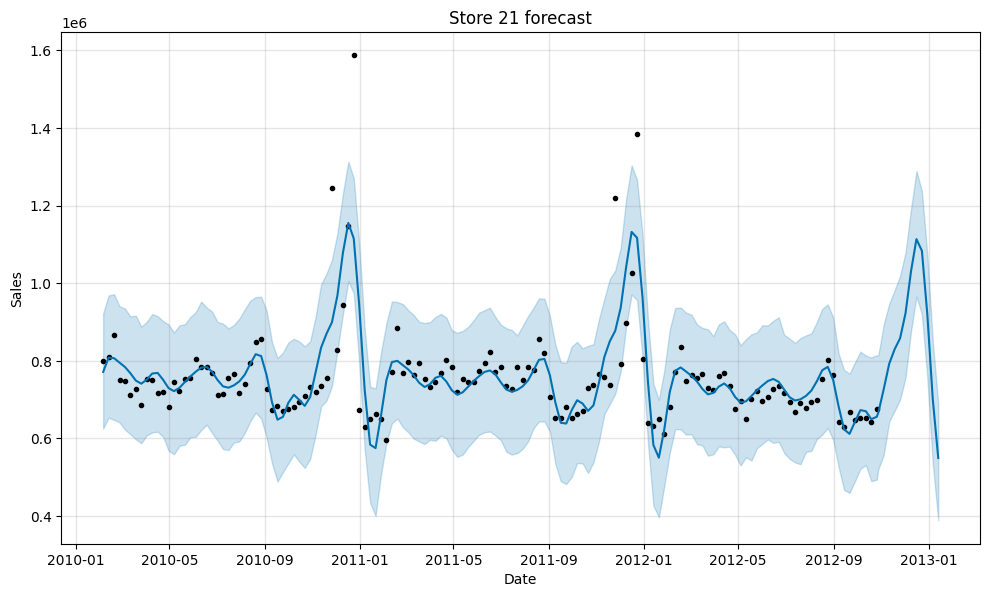

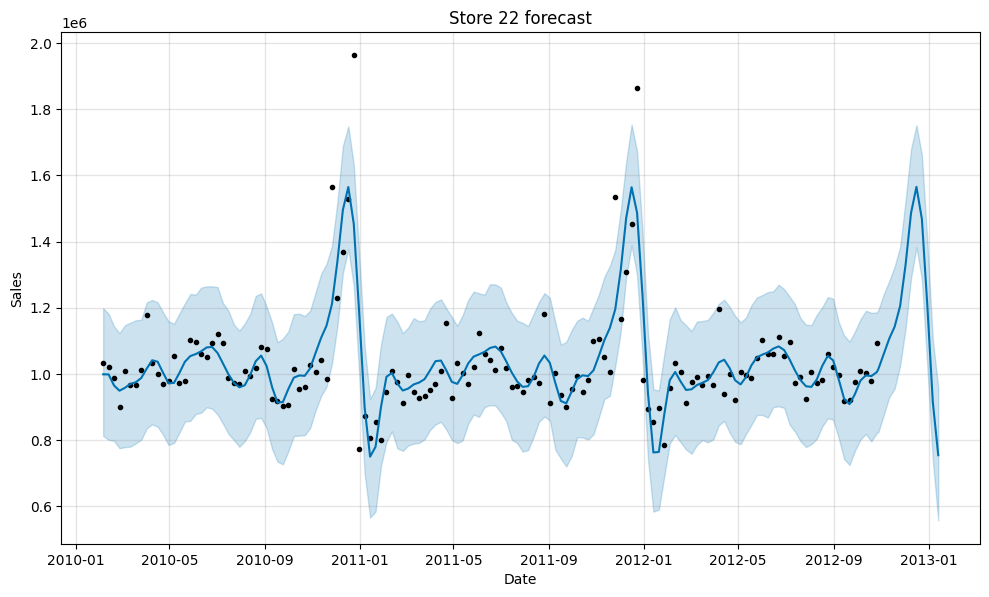

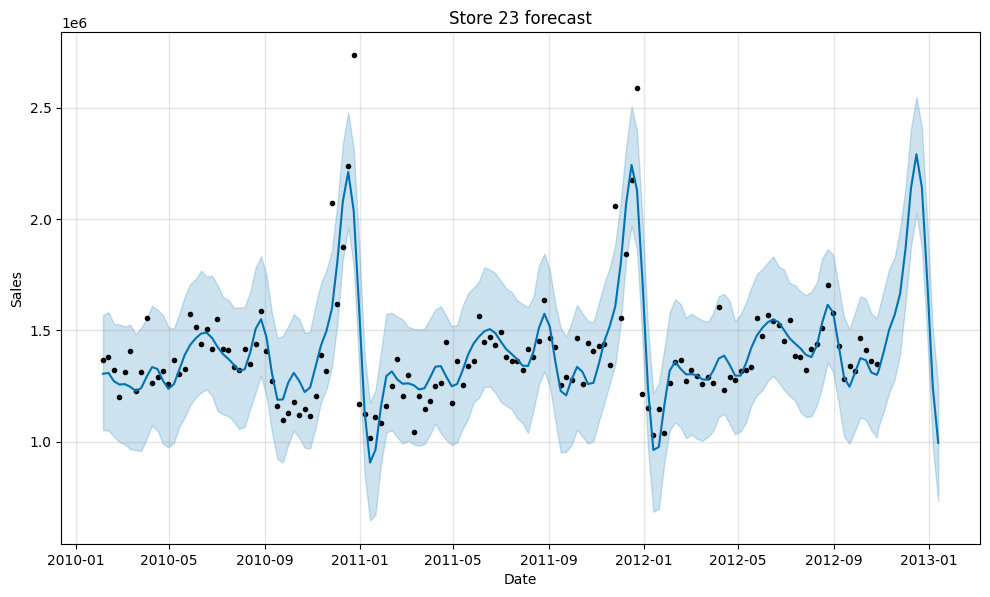

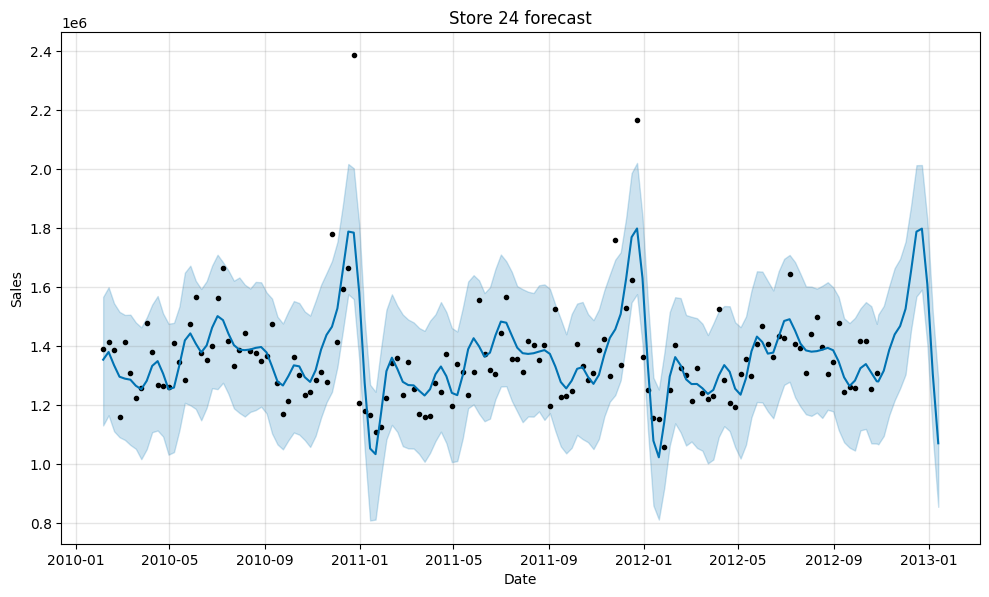

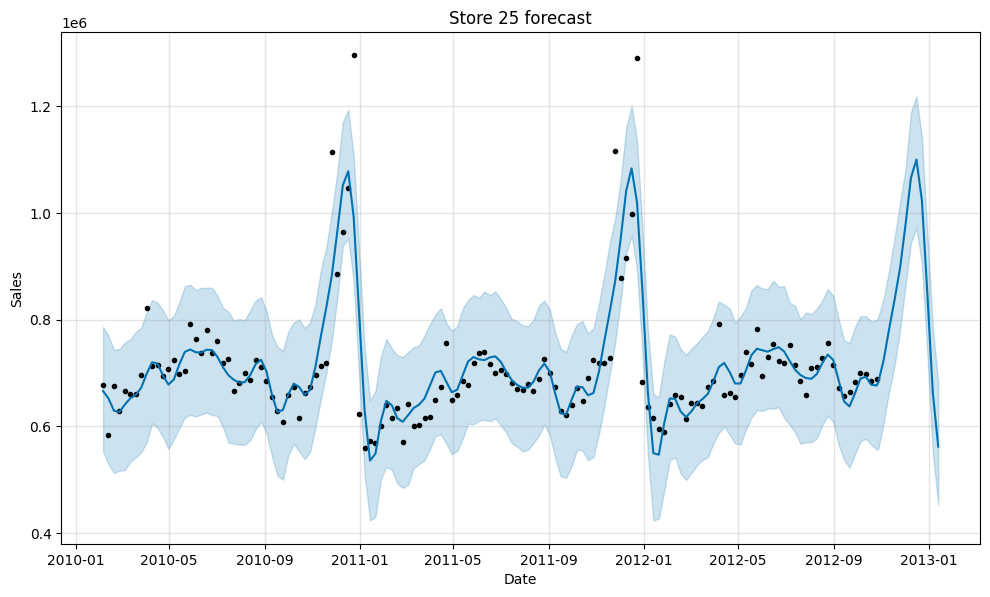

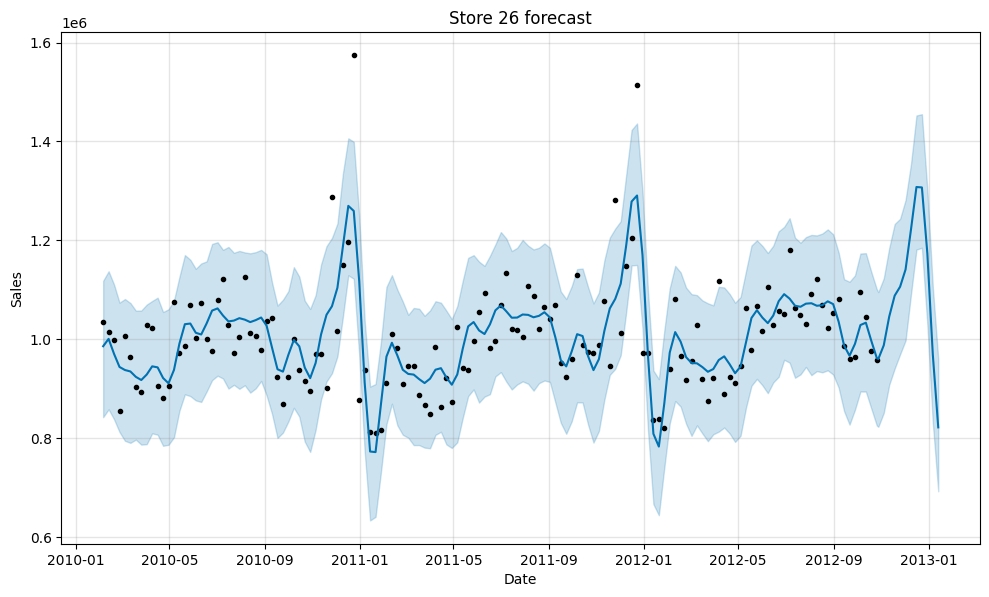

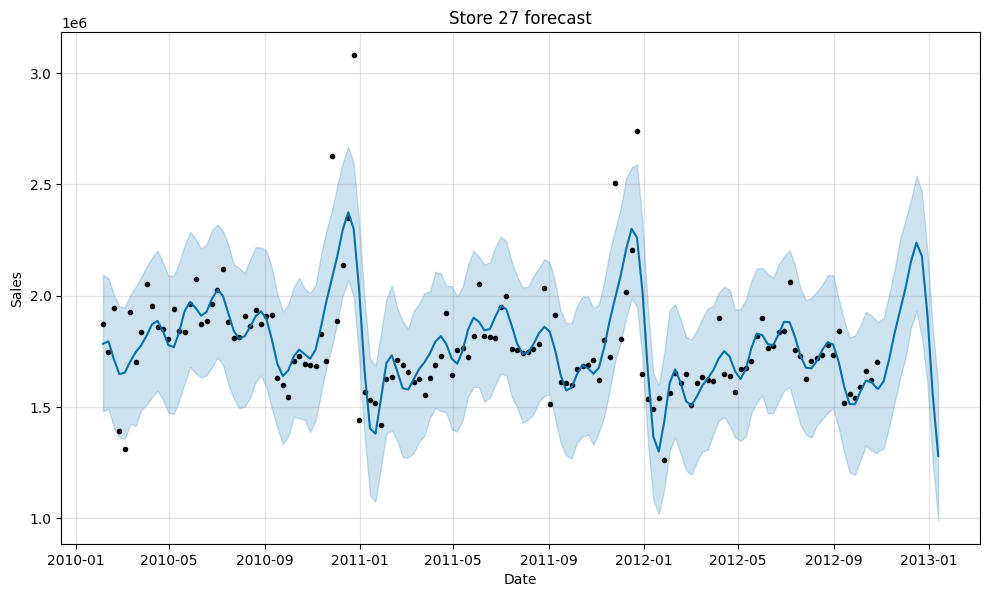

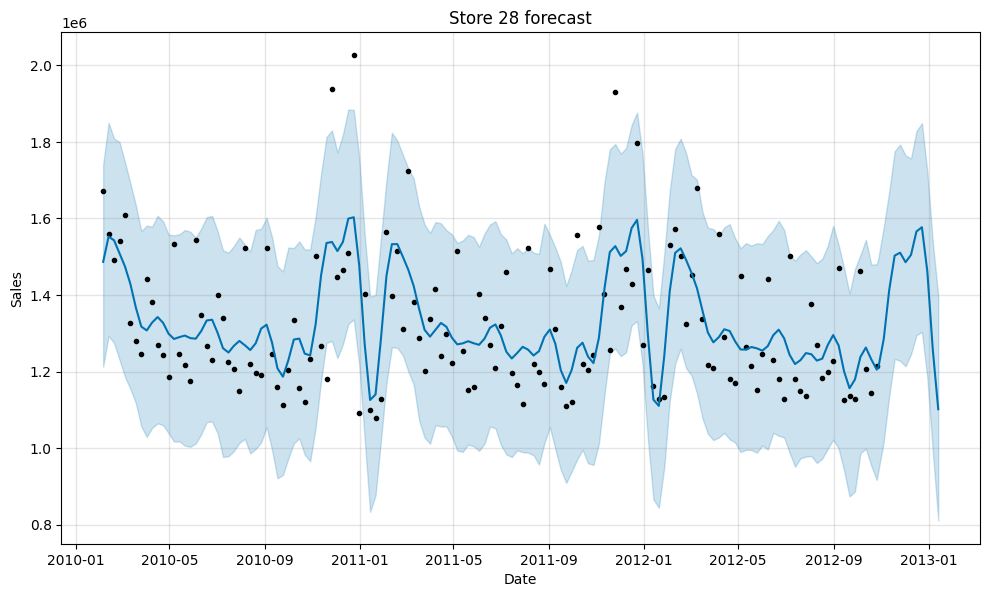

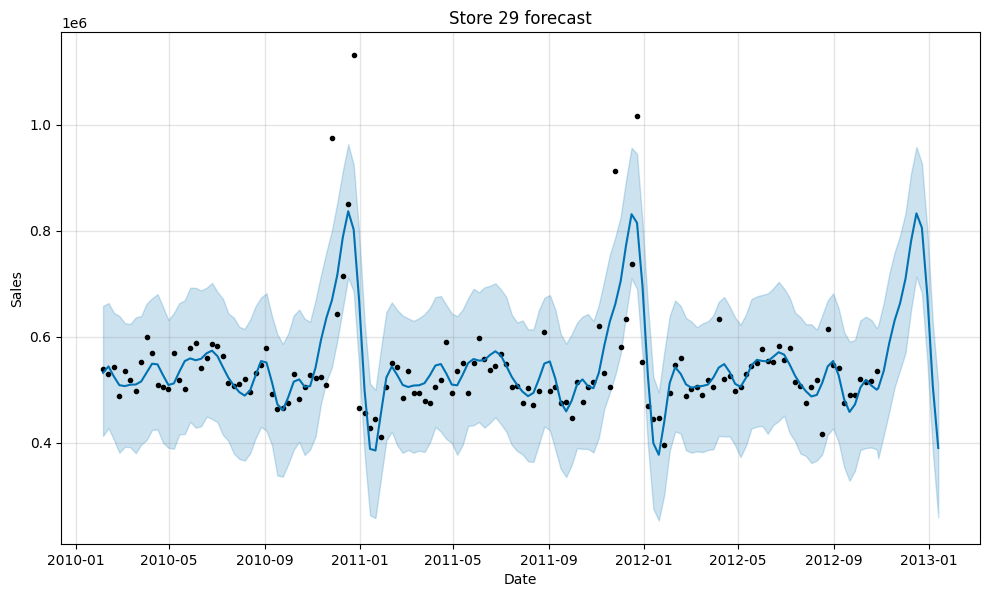

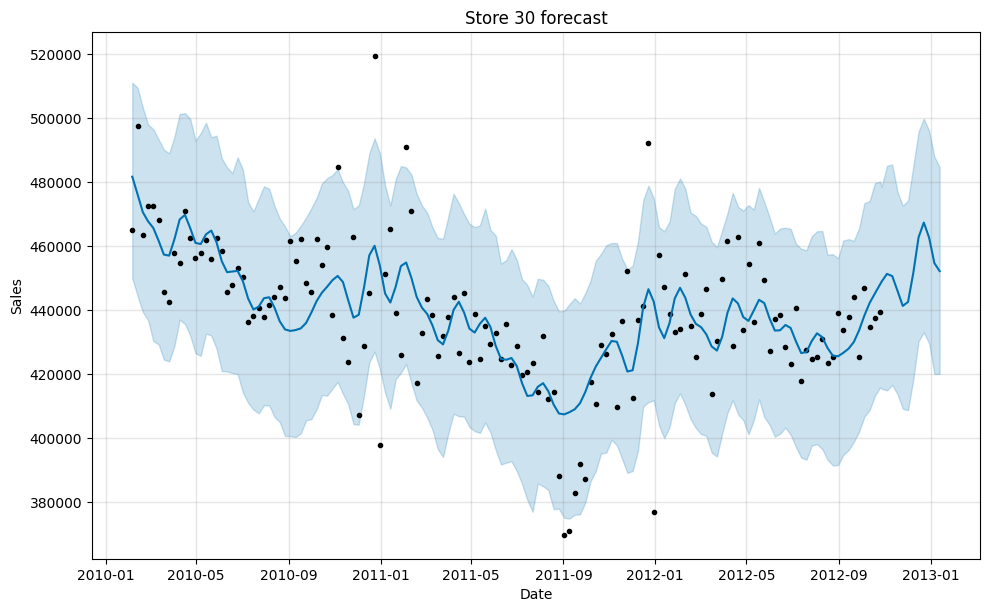

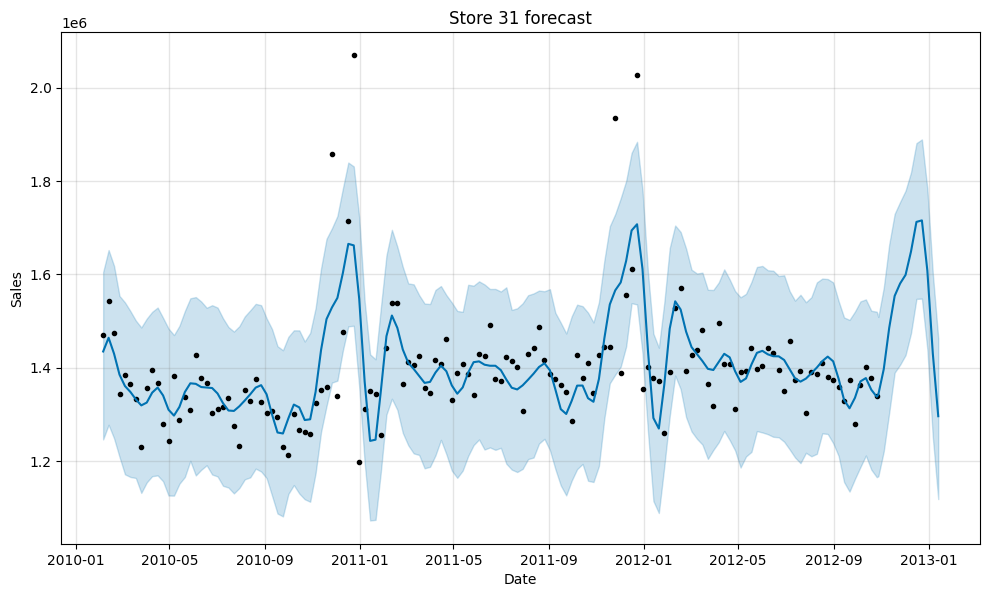

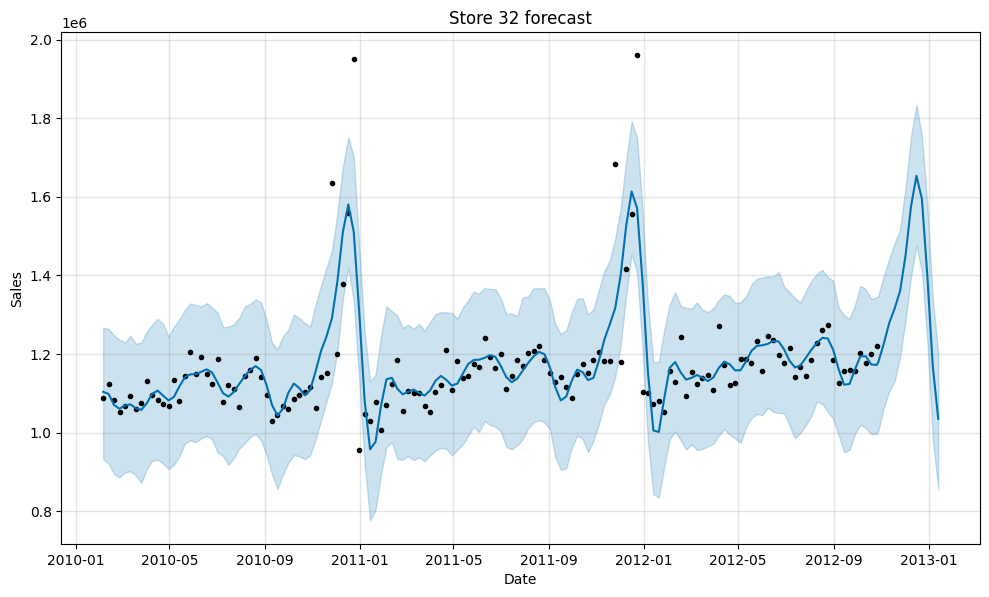

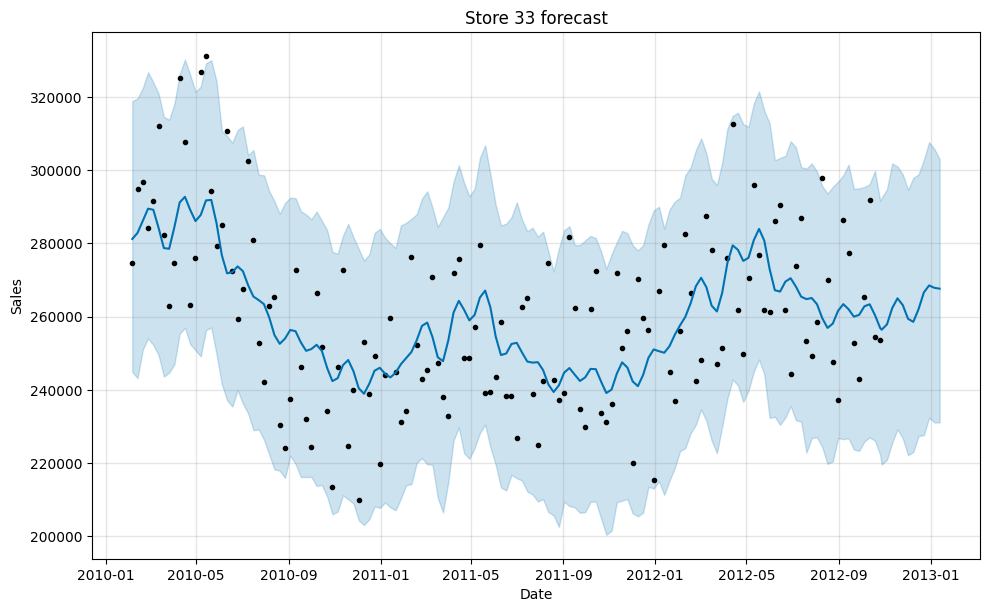

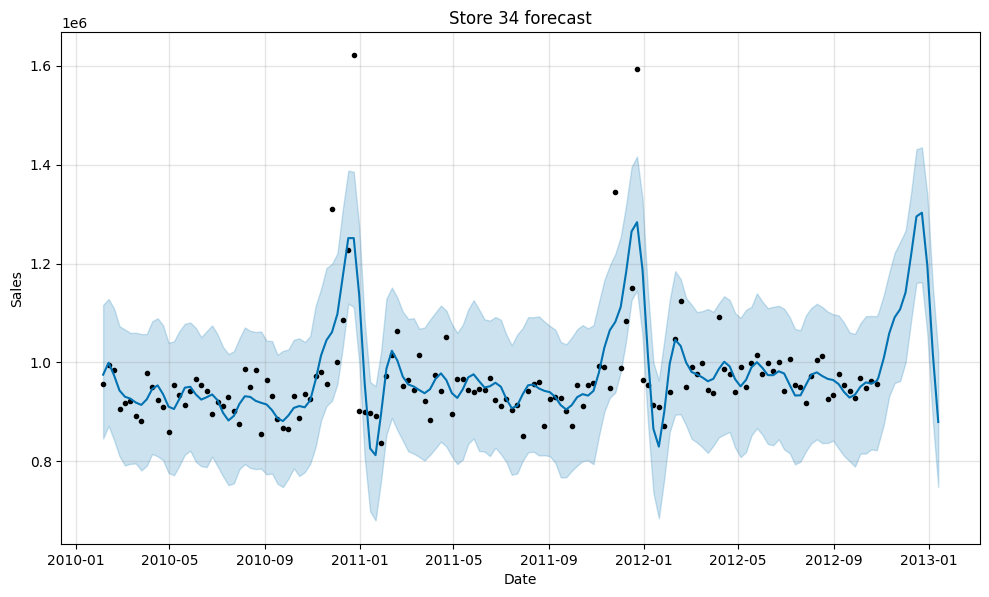

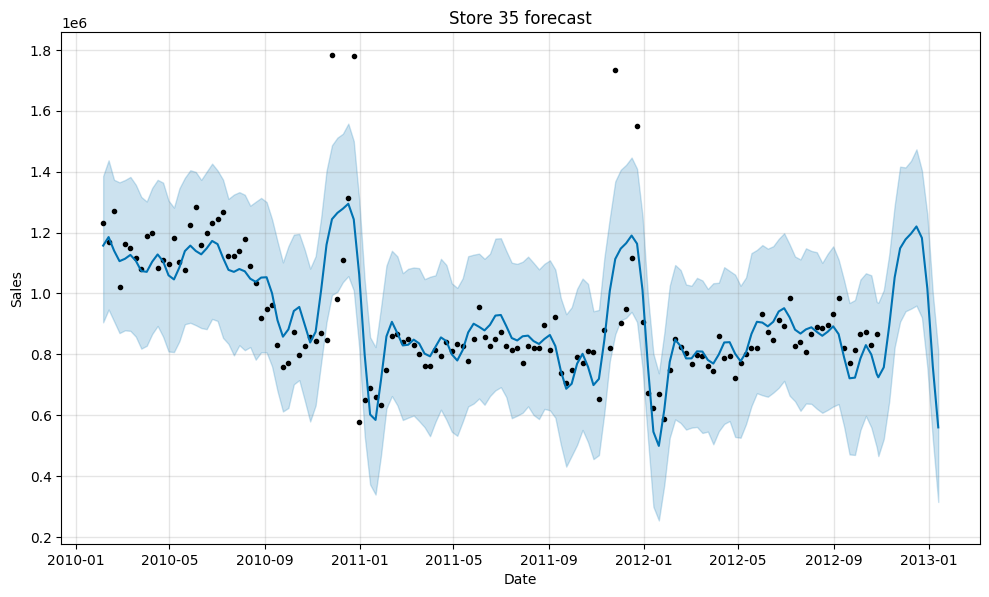

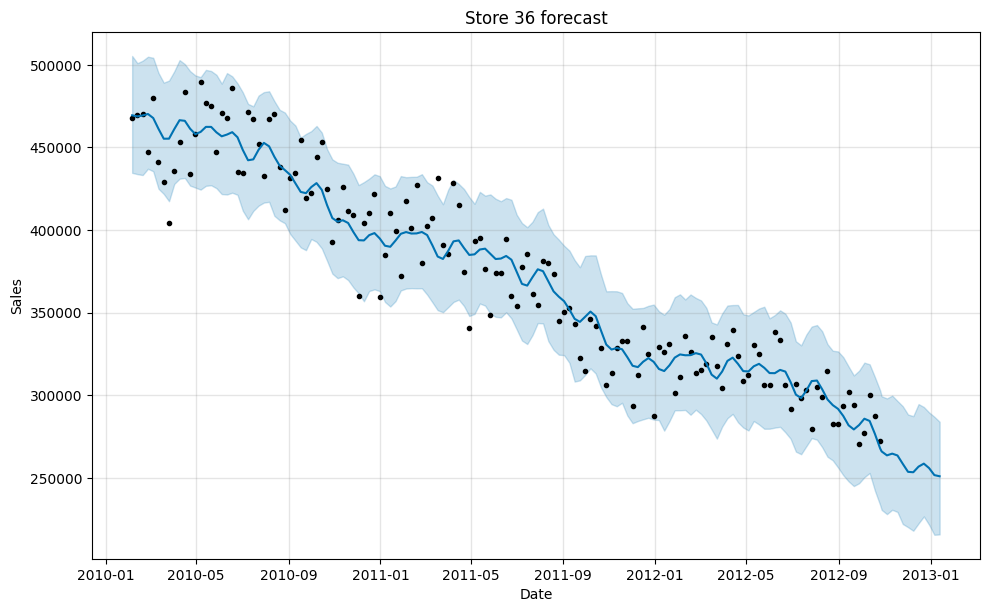

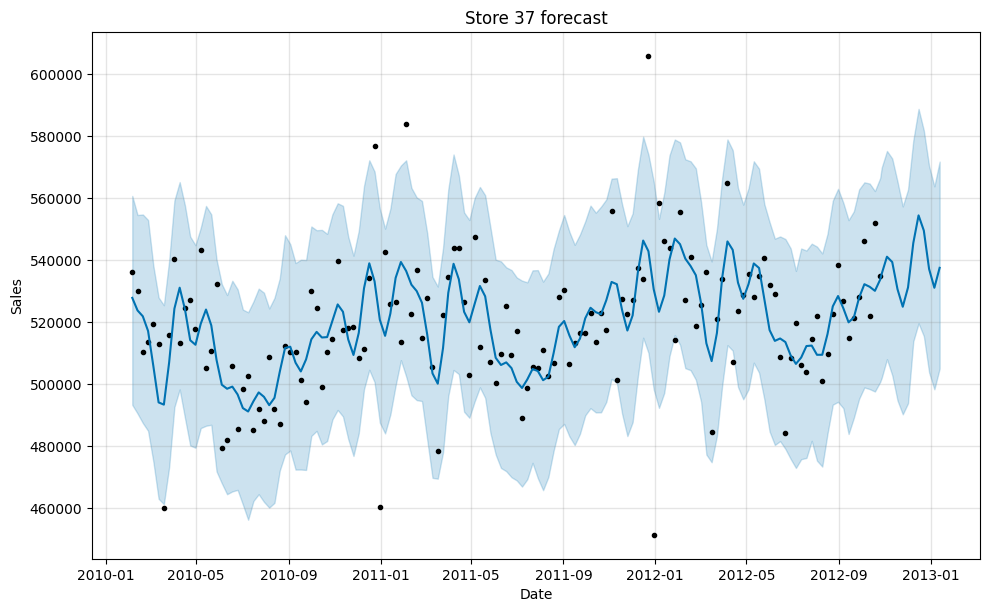

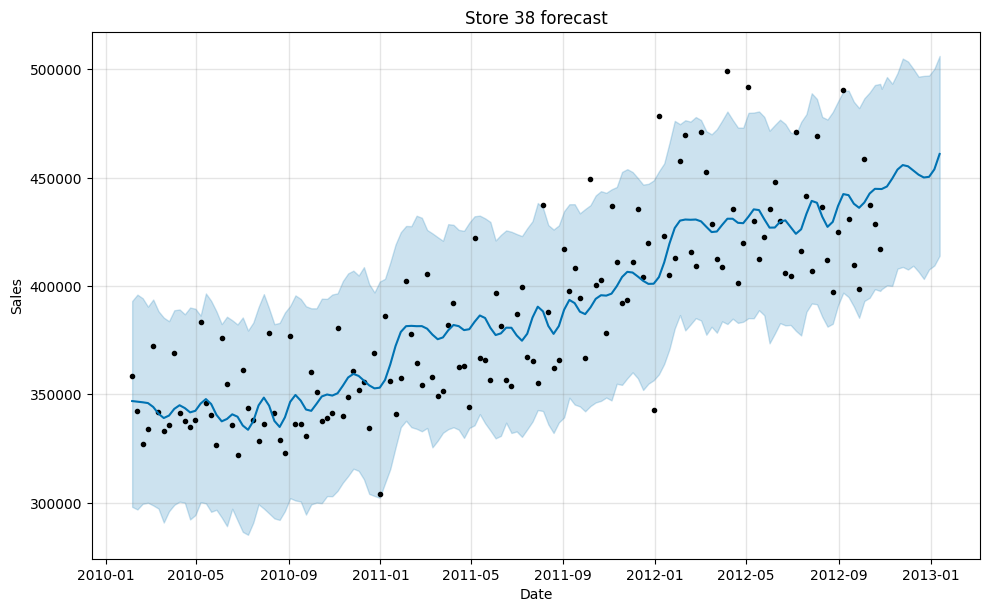

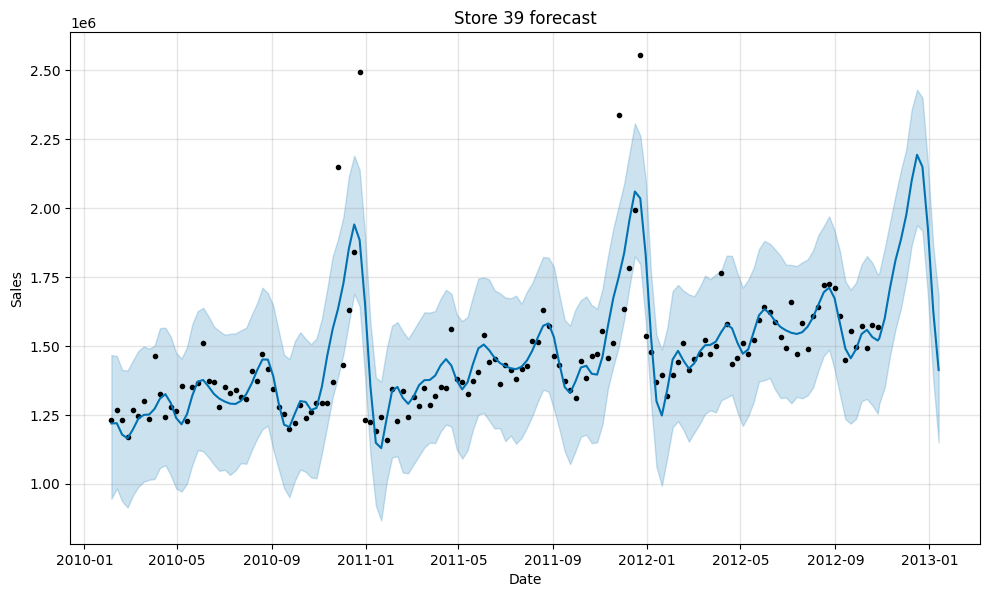

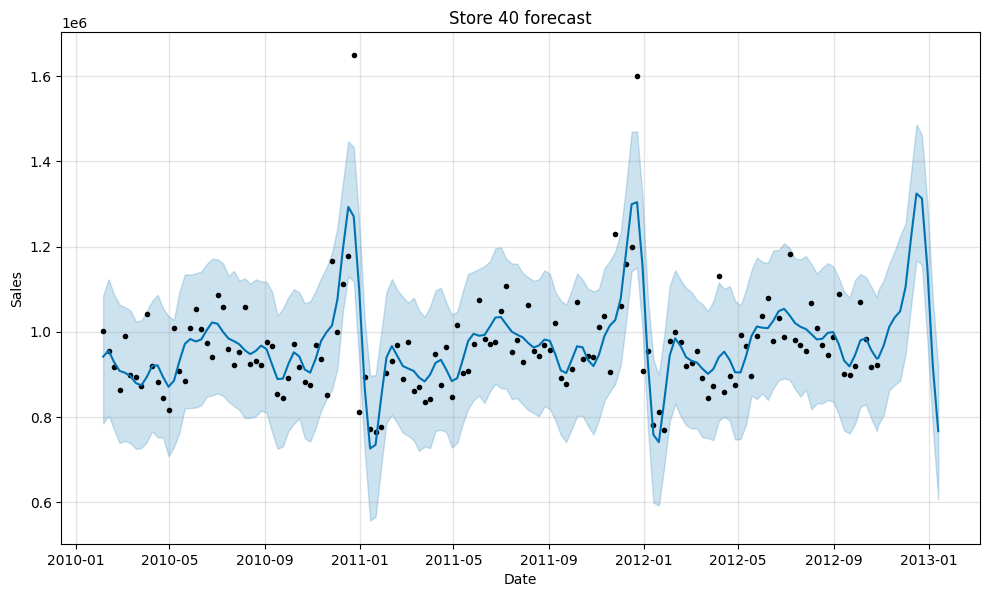

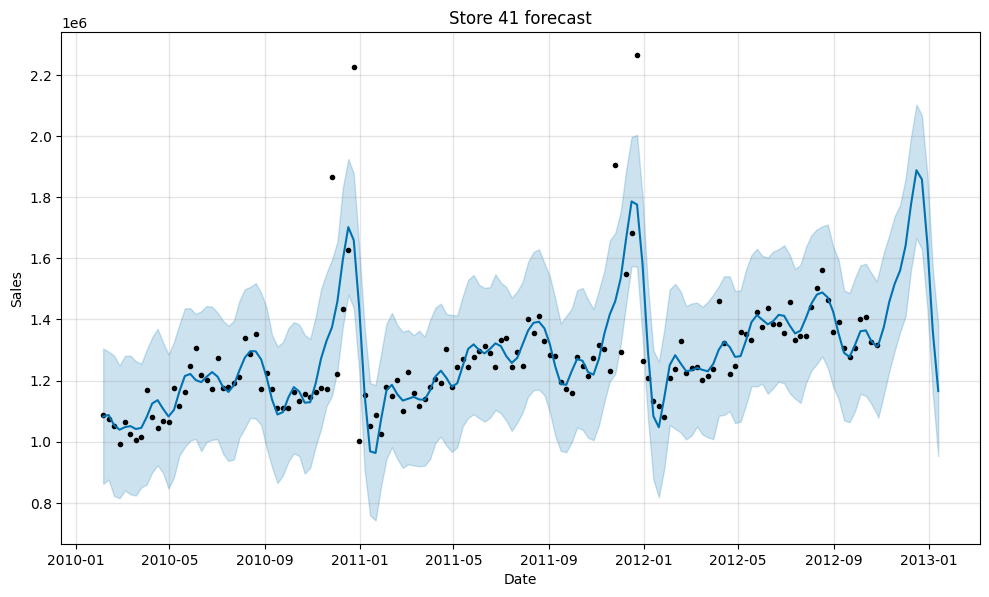

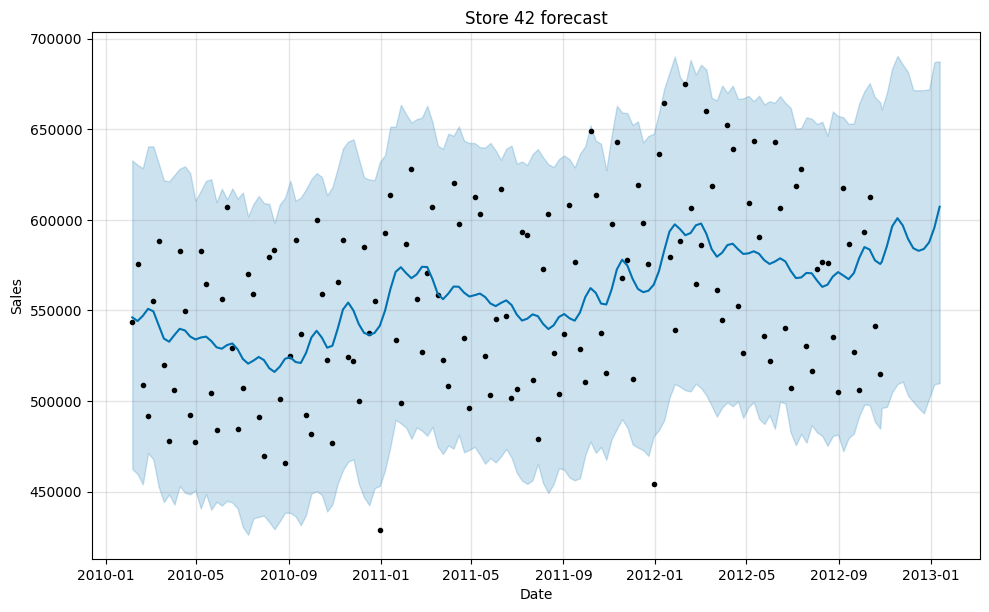

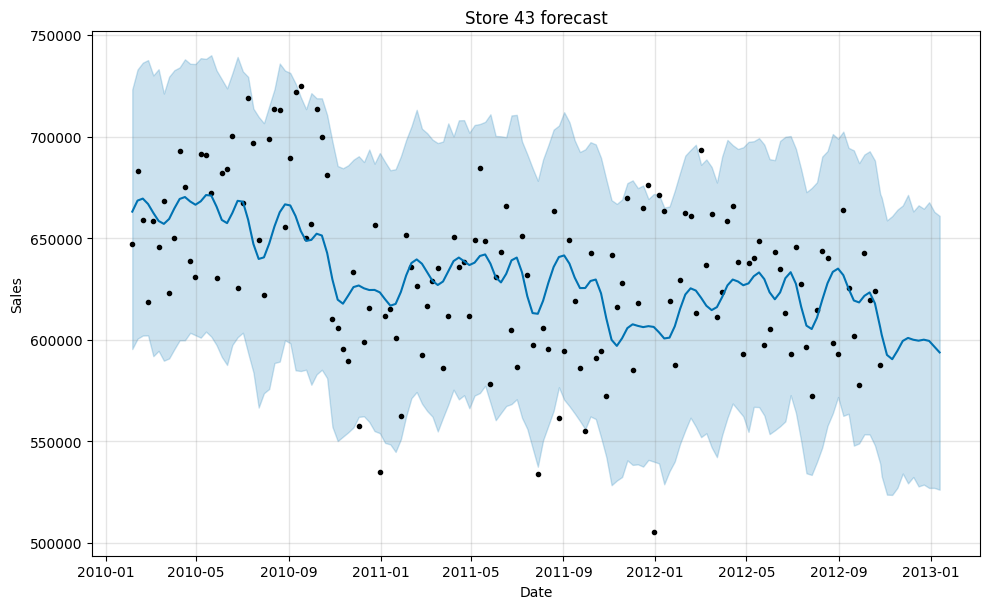

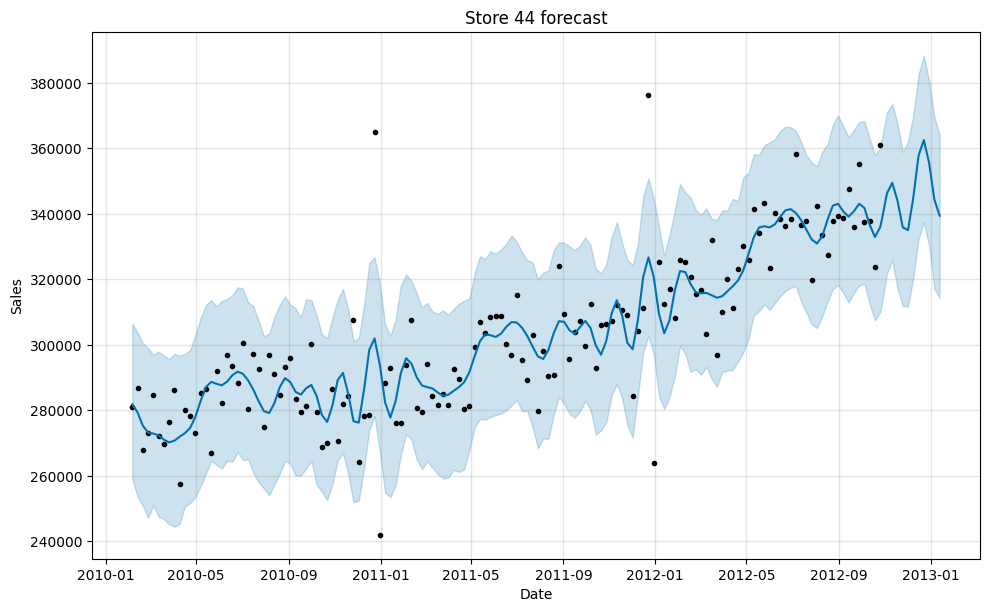

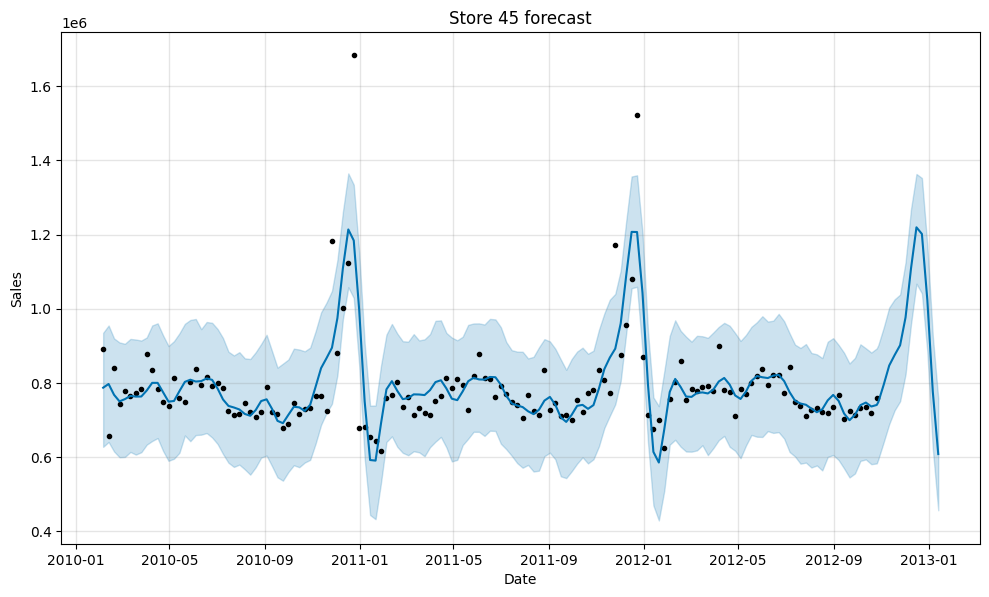

In [449]:
for i in list(weekly_sales['Store'].unique()):
  store_sales = weekly_sales[weekly_sales['Store']==i]
  store_sales = store_sales[['Date','Weekly_Sales']]
  store_sales.columns = ['ds','y']
  # store_sales['ds'] = pd.to_datetime(store1_sales['ds'])
  model = Prophet(interval_width=0.95)
  model.fit(store_sales)
  future_weeks = model.make_future_dataframe(periods=12,freq='W')
  forecast = model.predict(future_weeks)
  forecast[['yhat','yhat_lower','yhat_upper']] = forecast[['yhat','yhat_lower','yhat_upper']].astype(int)
  sales_forecast = model.plot(forecast)
  plt.title('Store '+str(i)+' forecast')
  plt.xlabel('Date')
  plt.ylabel('Sales')
  plt.show()


**Conclusion**

*   There is seasonal component in sales through holiday date, so the management have to taking into account the seasonal to stocking, merchandising, marketing etc. decision.
*   Although Thanksgiving Holiday in November contributed more sales than other holiday, it seems that December has higher MoM growth sales happening before Christmas.

*   Store 20 indeed has a high sales volume for 3 years. However, it's growth has been dominated by holiday date.



